# AUTOCONCEPTO SEXUAL: UN ESTUDIO EXPLORATORIO 

## TEMA

Este proyecto se centra en analizar el **autoconcepto sexual de hombres y mujeres desde la adolescencia hasta la vejez**. A través del instrumento de evaluación sexológico Multidimensional Sexual Self-Concept Questionnaire (MSSCQ), diseñado por el Dr. William E. Snell en 1995, se estudian, a través de 100 items, 20 aspectos de la sexualidad humana: ansiedad sexual, autoeficacia sexual, conciencia sexual, motivación para evitar prácticas sexuales de riesgo, control sexual por azar/suerte, preocupación sexual, asertividad sexual, optimismo sexual, autoinculpación por problemas sexuales, supervisión sexual, motivación sexual, gestión de problemas sexuales, autoestima sexual, satisfacción sexual, control sexual por parte de otros, autoesquemas sexuales, miedo al sexo, prevención de problemas sexuales, depresión sexual, control sexual interno. 

## HIPÓTESIS

HIPÓTESIS PRINCIPAL:

El género y la edad tienen relación con el autoconcepto sexual que pueda tener una persona.

OTRAS HIPÓTESIS:

- H1. Habrá diferencias significativas entre hombres y mujeres en cuanto a la vivencia de la ansiedad sexual.
- H2. La ansiedad sexual se vivirá en mayor o menor intensidad según el grupo de edad al que pertenezca una persona.  
- H3. La satisfación sexual se vivirá de forma diferente según el grupo de edad al que pertenezca la persona
- H4. La satisfacción sexual correlacionará de forma positiva con la autoestima sexual.
- H5. La ansiedad sexual correlacionará positivamente con el miedo al sexo.

# Librerías 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats


# Importar datos

In [2]:
df = pd.read_csv("./data/data.csv", delimiter = "\t") #Especificar delimitador de columnas 

# Primera exploración

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17685 entries, 0 to 17684
Columns: 102 entries, Q1 to gender
dtypes: int64(102)
memory usage: 13.8 MB


In [4]:
df.shape #Número de filas y columnas

(17685, 102)

In [5]:
df.head(5)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q93,Q94,Q95,Q96,Q97,Q98,Q99,Q100,age,gender
0,3,2,5,5,1,2,2,1,1,2,...,4,1,1,5,5,3,5,4,23,1
1,5,1,5,1,1,2,1,3,1,1,...,1,1,1,2,1,1,5,3,25,2
2,1,4,5,5,1,4,5,5,5,4,...,5,5,1,5,4,4,1,4,20,1
3,5,4,5,5,5,5,2,4,5,5,...,4,1,2,5,0,4,5,5,23,2
4,4,5,4,5,4,2,3,2,4,5,...,1,1,3,1,1,1,4,3,50,2


Se observan los 100 items del MSSCQ, la edad y el género, un total de 102 columnas.

In [6]:
nulls = df.isnull().sum().all()
nulls

False

No hay valores nulos en la base de datos.

In [7]:
df["gender"].value_counts()

gender
2    9944
1    7298
3     378
0      65
Name: count, dtype: int64

Las opciones de respuesta del cuestionario son 5, siendo: 1=Not at all characteristic of me, 2=Slightly characteristic of me, 3=Somewhat characteristic of me, 4=Moderately characteristic of me, 5=Very characteristic of me. Hago un describe para ver si los mínimos y máximos de respuesta coinciden. Si no es así, limpio.

In [8]:
df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q93,Q94,Q95,Q96,Q97,Q98,Q99,Q100,age,gender
count,17685.000000,17685.000000,17685.000000,17685.000000,17685.000000,17685.000000,17685.000000,17685.000000,17685.000000,17685.000000,...,17685.000000,17685.000000,17685.000000,17685.000000,17685.000000,17685.000000,17685.000000,17685.000000,1.768500e+04,17685.000000
mean,2.608538,3.450721,4.032061,3.414589,2.526944,2.943964,2.811479,3.496579,3.343116,3.129262,...,3.118405,2.839638,1.899915,3.872152,3.556064,3.460843,2.332316,3.845010,4.996317e+02,1.601357
std,1.403072,1.340230,1.182624,1.517489,1.411380,1.384093,1.377499,1.368016,1.299522,1.398906,...,1.463807,1.511683,1.250036,1.373439,1.583706,1.310316,1.482156,1.362199,6.276146e+04,0.538370
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.300000e+01,0.000000
25%,1.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,1.000000,3.000000,2.000000,3.000000,1.000000,3.000000,1.900000e+01,1.000000
50%,2.000000,4.000000,4.000000,4.000000,2.000000,3.000000,3.000000,4.000000,4.000000,3.000000,...,3.000000,3.000000,1.000000,4.000000,4.000000,4.000000,2.000000,4.000000,2.200000e+01,2.000000
75%,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,...,4.000000,4.000000,3.000000,5.000000,5.000000,4.000000,4.000000,5.000000,3.100000e+01,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,8.346346e+06,3.000000


Observo que el mínimo en las respuesta de los items Q1 a Q100 es de 0, lo cual no tiene sentido, no es un valor válido para el cuestionario. Elimino las filas de las columnas cuya respuesta a algún ítem sea 0, ya que no da fiabilidad en la respuesta de la persona. 

In [9]:
df = df.drop(df[(df.iloc[:, :100] == 0).any(axis=1)].index)

In [10]:
df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q93,Q94,Q95,Q96,Q97,Q98,Q99,Q100,age,gender
count,12789.000000,12789.000000,12789.000000,12789.000000,12789.000000,12789.000000,12789.000000,12789.000000,12789.000000,12789.000000,...,12789.000000,12789.000000,12789.000000,12789.000000,12789.000000,12789.000000,12789.000000,12789.000000,1.278900e+04,12789.000000
mean,2.617953,3.460787,4.056768,3.441708,2.530456,2.952694,2.823598,3.518962,3.379701,3.160138,...,3.196888,2.928767,1.949801,3.990773,3.667449,3.572836,2.387442,3.966221,6.799153e+02,1.600829
std,1.391395,1.317384,1.133655,1.492600,1.400305,1.371614,1.353757,1.336743,1.263221,1.373940,...,1.375254,1.435401,1.214221,1.202935,1.475550,1.152896,1.441086,1.186457,7.380350e+04,0.540018
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.300000e+01,0.000000
25%,1.000000,2.000000,4.000000,2.000000,1.000000,2.000000,2.000000,3.000000,2.000000,2.000000,...,2.000000,2.000000,1.000000,3.000000,2.000000,3.000000,1.000000,3.000000,1.900000e+01,1.000000
50%,2.000000,4.000000,4.000000,4.000000,2.000000,3.000000,3.000000,4.000000,4.000000,3.000000,...,3.000000,3.000000,1.000000,4.000000,4.000000,4.000000,2.000000,4.000000,2.200000e+01,2.000000
75%,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,...,4.000000,4.000000,3.000000,5.000000,5.000000,4.000000,4.000000,5.000000,3.100000e+01,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,8.346346e+06,3.000000


Según el codebook, la codificación de la base de dato en cuanto al género refiere que 1 = "hombre" ; 2 = "mujer" ; 3 = "otro" ; 0 = "no eligió". Dados los pocos valores de 0 y 3, eliminaremos esas filas en el apartado de Limpieza y sólo dejamos en la base de datos las respuestas de hombres y mujeres.

En cuanto a la edad, se observa que el mínimo es de 13 años y el máximo no es real, puesto que es una persona con más de 8 millones de años. En el apartado de Limpieza se procederá a crear grupos de edades relativos a la adolescencia, juventud, adultez y vejez, previamente habiendo limpiado las edades dejando un límite máximo de 105 años.

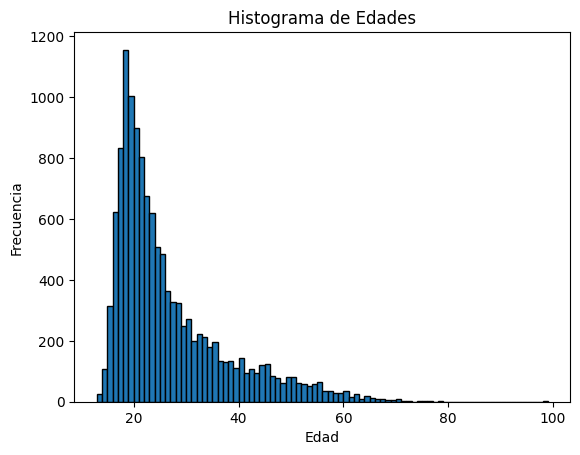

In [11]:
plt.hist(df["age"], bins=range(13, 100, 1), edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades')
plt.show()

# Limpieza

En primer lugar, dejamos sólo las filas de hombres y mujeres.

In [12]:
df = df.drop(df[(df["gender"] == 0) | (df["gender"] == 3)].index)

In [13]:
df["gender"].value_counts()

gender
2    7148
1    5310
Name: count, dtype: int64

Convertimos el género (int) a categórica (str)

In [14]:
# Mapear los valores numéricos a categorías
df['gender'] = df['gender'].map({1: 'man', 2: 'woman'})

Limpiamos la base de datos con respecto a las edades:

In [15]:
df = df.drop(df[df["age"] >= 105].index)

In [16]:
df["age"].describe()

count    12451.000000
mean        26.319251
std         10.778887
min         13.000000
25%         19.000000
50%         22.000000
75%         31.000000
max         99.000000
Name: age, dtype: float64

In [17]:
df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q92,Q93,Q94,Q95,Q96,Q97,Q98,Q99,Q100,age
count,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000,...,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000
mean,2.613043,3.463336,4.061120,3.439965,2.530801,2.954702,2.825877,3.527909,3.378925,3.155891,...,3.774235,3.198940,2.929805,1.946591,3.997109,3.674966,3.576500,2.383825,3.969641,26.319251
std,1.390607,1.315035,1.130607,1.491014,1.398994,1.370382,1.353873,1.332240,1.263139,1.373250,...,1.031876,1.372894,1.434253,1.210313,1.197786,1.472958,1.150934,1.438169,1.182555,10.778887
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000
25%,1.000000,2.000000,4.000000,2.000000,1.000000,2.000000,2.000000,3.000000,2.000000,2.000000,...,3.000000,2.000000,2.000000,1.000000,3.000000,2.000000,3.000000,1.000000,3.000000,19.000000
50%,2.000000,4.000000,4.000000,4.000000,2.000000,3.000000,3.000000,4.000000,4.000000,3.000000,...,4.000000,3.000000,3.000000,1.000000,4.000000,4.000000,4.000000,2.000000,4.000000,22.000000
75%,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,3.000000,5.000000,5.000000,4.000000,4.000000,5.000000,31.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,99.000000


Ahora tengo una base de datos sólo con hombres y mujeres de edades comprendidas entre los 13 y 99 años.

Creamos una variable relativa al "Grupo de edad" de las personas de modo que:
- Adolescencia (de 13 a 19 años)
- Juventud (de 20 a 30 años)
- Adultez (de 31 a 64 años)
- Vejez (de 65 a 99 años)

In [18]:
# Definir los límites de los grupos de edad
bins = [13, 19, 30, 64, 100]
labels = ['Adolescence', 'Youth', 'Adulthood', 'Elderly']

# Crear la columna "Grupo de edad" utilizando pd.cut()
df['Age Group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [19]:
df["Age Group"].value_counts()

Age Group
Youth          6113
Adulthood      3312
Adolescence    2947
Elderly          79
Name: count, dtype: int64

Quiero ver cómo de repartidas están las edades:

In [20]:
# Crear un diccionario para almacenar la cantidad de veces que se repite cada edad
cantidad_edades = {}

# Iterar sobre las edades desde 13 hasta 100 años
for edad in range(13, 101):
    # Contar la cantidad de veces que aparece cada edad y guardarla en el diccionario
    cantidad_edades[edad] = (df['age'] == edad).sum()

# Imprimir la cantidad de veces que se repiten las edades
for edad, cantidad in cantidad_edades.items():
    print(f"Edad: {edad}, Repeticiones: {cantidad}")


Edad: 13, Repeticiones: 22
Edad: 14, Repeticiones: 99
Edad: 15, Repeticiones: 302
Edad: 16, Repeticiones: 596
Edad: 17, Repeticiones: 806
Edad: 18, Repeticiones: 1122
Edad: 19, Repeticiones: 980
Edad: 20, Repeticiones: 881
Edad: 21, Repeticiones: 776
Edad: 22, Repeticiones: 659
Edad: 23, Repeticiones: 611
Edad: 24, Repeticiones: 498
Edad: 25, Repeticiones: 469
Edad: 26, Repeticiones: 356
Edad: 27, Repeticiones: 326
Edad: 28, Repeticiones: 317
Edad: 29, Repeticiones: 240
Edad: 30, Repeticiones: 267
Edad: 31, Repeticiones: 198
Edad: 32, Repeticiones: 216
Edad: 33, Repeticiones: 206
Edad: 34, Repeticiones: 177
Edad: 35, Repeticiones: 194
Edad: 36, Repeticiones: 131
Edad: 37, Repeticiones: 128
Edad: 38, Repeticiones: 133
Edad: 39, Repeticiones: 111
Edad: 40, Repeticiones: 141
Edad: 41, Repeticiones: 94
Edad: 42, Repeticiones: 105
Edad: 43, Repeticiones: 89
Edad: 44, Repeticiones: 117
Edad: 45, Repeticiones: 119
Edad: 46, Repeticiones: 84
Edad: 47, Repeticiones: 77
Edad: 48, Repeticiones: 6

In [21]:
# Definir los límites de los grupos de edad
bins = list(range(13, 102))
labels = [f"{i} years old" for i in range(13, 101)]

# Crear la columna "Grupo de edad" utilizando pd.cut()
df['years_old'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

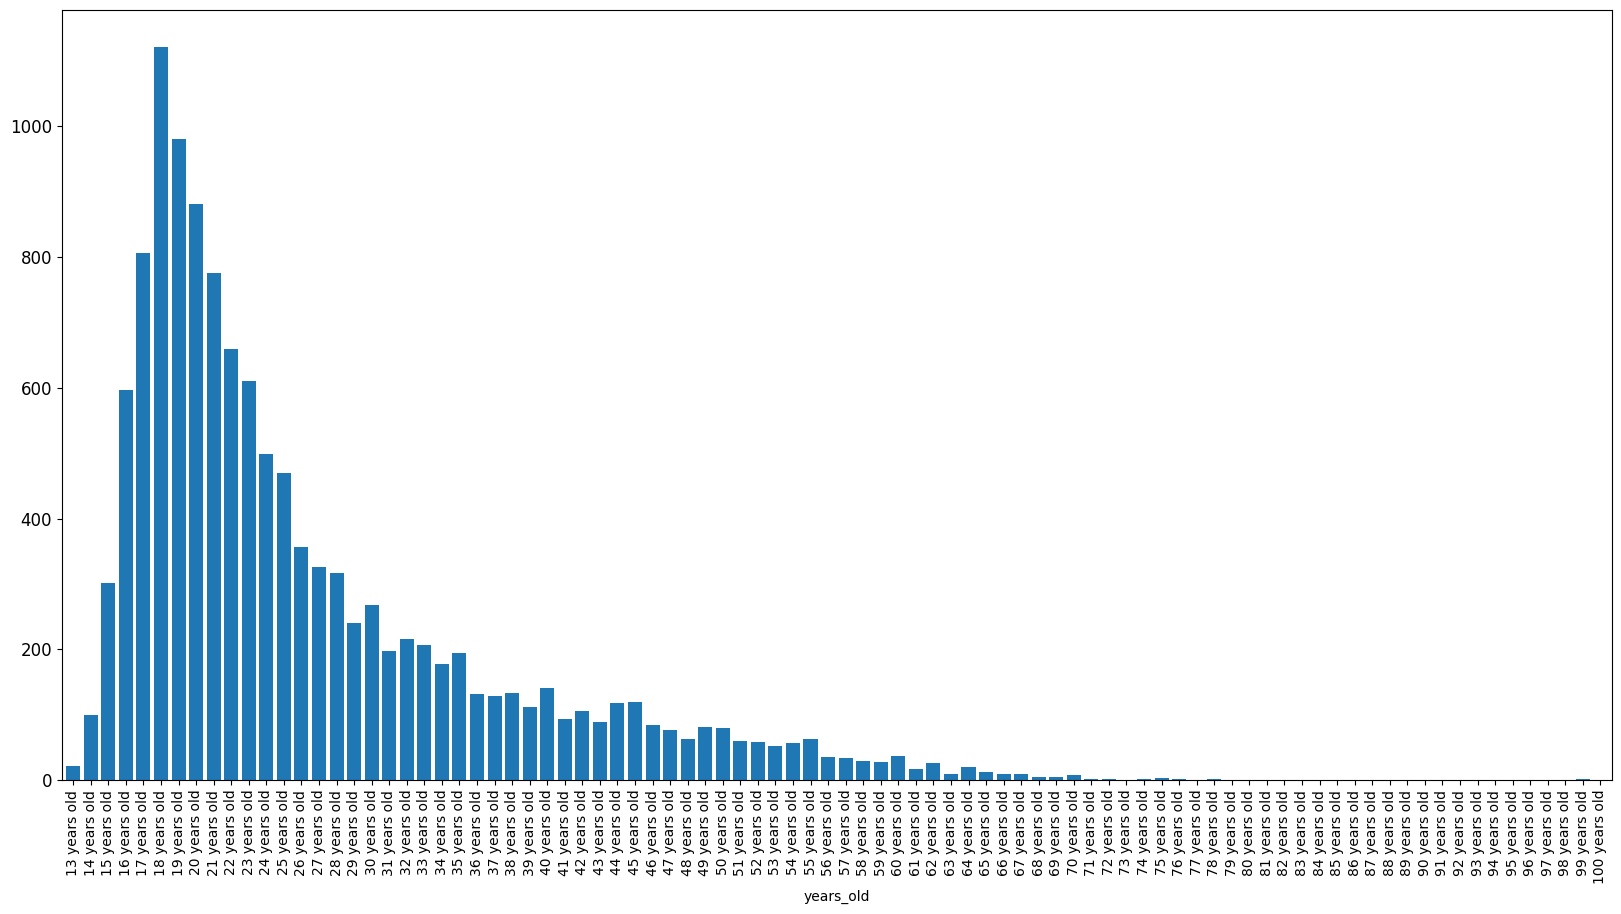

In [22]:
# Establecer el tamaño de la figura y el tamaño de la fuente
plt.figure(figsize=(20, 10))  # Ajusta el tamaño de la figura según sea necesario
plt.xticks(rotation=90, fontsize=10)  # Rotar y ajustar el tamaño de la fuente de las etiquetas del eje x
plt.yticks(fontsize=12)  # Ajustar el tamaño de la fuente de las etiquetas del eje y

# Graficar el histograma de la columna "years_old"
df["years_old"].value_counts().sort_index().plot(kind='bar', width=0.8)

# Mostrar el gráfico
plt.show()

In [23]:
grouped_counts = df.groupby(["Age Group", "gender"]).size()
grouped_counts

C:\Users\maria\AppData\Local\Temp\ipykernel_22180\3219836235.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = df.groupby(["Age Group", "gender"]).size()


Age Group    gender
Adolescence  man        990
             woman     1957
Youth        man       2492
             woman     3621
Adulthood    man       1761
             woman     1551
Elderly      man         63
             woman       16
dtype: int64

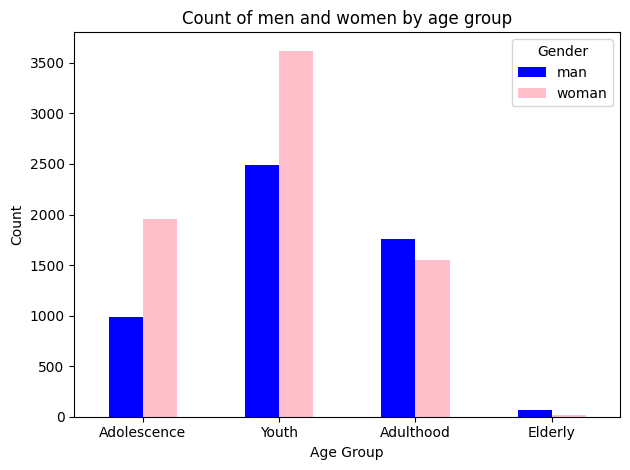

In [24]:
# Reorganizar los datos para tener una estructura más adecuada para la gráfica
grouped_counts_unstacked = grouped_counts.unstack()

# Graficar los datos
grouped_counts_unstacked.plot(kind='bar', color=["blue", "pink"])

# Añadir etiquetas y título
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count of men and women by age group')
plt.xticks(rotation=360)  # Rotar las etiquetas del eje x para mejorar la legibilidad

# Mostrar la gráfica
plt.legend(title='Gender')
plt.tight_layout()  # Ajustar el diseño para evitar que se superpongan los elementos
plt.show()


Se observa muy poca representación del grupo de la vejez. Serían outliers de nuestra muestra en cuanto a la edad.

A continuación, se crean las 20 columnas relativas a las 20 subescalas del MSSCQ. Para la creación de cada columna, se lleva a cabo la media de los siguientes items. Hay que tener en cuenta que algunos items están invertidos (R), es decir, están formulados de forma inversa a lo que representa la categoría de la que forma parte, por lo que, posteriormente, habrá que invertir las respuestas:
1. sexual-anxiety (items 1‚ 21‚ 41‚ 61‚ 81) 
2. sexual self-efficacy (items 2‚ 22‚ 42‚ 62‚ 82) 
3. sexual-consciousness (3‚ 23‚ 43‚ 63‚ 83) 
4. motivation to avoid risky sex (items 4‚ 24‚ 44‚ 64‚ 84) 
5. chance/luck sexual control (items 5‚ 25‚ 45‚ 65‚ 85) 
6. sexual-preoccupation (items 6‚ 26‚ 46‚ 66‚ 86) 
7. sexual-assertiveness (items 7‚ 27R‚ 47R‚ 67‚ 87) 
8. sexual-optimism (items 8‚ 28‚ 48‚ 68R‚ 88R)
9. sexual problem self-blame (items 9‚ 29‚ 49‚ 69‚ 89)
19. sexual-monitoring (items 10‚ 30‚ 50‚ 70‚ 90)
11. sexual-motivation (items 11‚ 31‚ 51‚ 71‚ 91) 
12. sexual problem management (items 12‚ 32‚ 52‚ 72‚ 92) 
13. sexual-esteem (items 13‚ 33‚ 53‚ 73‚ 93)
14. sexual-satisfaction (items 14‚ 34‚ 54‚ 74‚ 94) 
15. power-other sexual control (items 15‚ 35‚ 55‚ 75‚ 95)
16. sexual self-schemata (items 16‚ 36‚ 56‚ 76‚ 96)
17. fear-of-sex (items 17‚ 37‚ 57‚ 77R‚ 97R)
18. sexual problem prevention (items 18‚ 38‚ 58‚ 78‚ 98) 
19. sexual-depression (items 19‚ 39‚ 59‚ 79‚ 99)
20. internal-sexual-control (items 20‚ 40‚ 60‚ 80‚ 100).

In [25]:
#Items que queremos invertir
items_to_invert = ['Q27', 'Q47', 'Q68', 'Q88', 'Q77', 'Q97']

# Invertir los items. Si en un item la respuesta era 1, ahora será 5. Si era 2, ahora será 4...
df[items_to_invert] = df[items_to_invert].apply(lambda x: 6 - x)

# Crear columnas por cada categoría o temática sexual mediante la media de la suma de los items correspondientes
df['Sexual_anxiety'] = df[['Q1', 'Q21', 'Q41', 'Q61', 'Q81']].mean(axis=1)
df['Sexual_self-efficacy'] = df[['Q2', 'Q22', 'Q42', 'Q62', 'Q82']].mean(axis=1)
df['Sexual_consciousness'] = df[['Q3', 'Q23', 'Q43', 'Q63', 'Q83']].mean(axis=1)
df['Motivation_to_avoid_risky_sex'] = df[['Q4', 'Q24', 'Q44', 'Q64', 'Q84']].mean(axis=1)
df['Chance/luck_sexual_control'] = df[['Q5', 'Q25', 'Q45', 'Q65', 'Q85']].mean(axis=1)
df['Sexual_preoccupation'] = df[['Q6', 'Q26', 'Q46', 'Q66', 'Q86']].mean(axis=1)
df['Sexual_assertiveness'] = df[['Q7', 'Q27', 'Q47', 'Q67', 'Q87']].mean(axis=1)
df['Sexual_optimism'] = df[['Q8', 'Q28', 'Q48', 'Q68', 'Q88']].mean(axis=1)
df['Sexual_problem_self-blame'] = df[['Q9', 'Q29', 'Q49', 'Q69', 'Q89']].mean(axis=1)
df['Sexual_monitoring'] = df[['Q10', 'Q30', 'Q50', 'Q70', 'Q90']].mean(axis=1)
df['Sexual_motivation'] = df[['Q11', 'Q31', 'Q51', 'Q71', 'Q91']].mean(axis=1)
df['Sexual_problem_management'] = df[['Q12', 'Q32', 'Q52', 'Q72', 'Q92']].mean(axis=1)
df['Sexual_self-esteem'] = df[['Q13', 'Q33', 'Q53', 'Q73', 'Q93']].mean(axis=1)
df['Sexual_satisfaction'] = df[['Q14', 'Q34', 'Q54', 'Q74', 'Q94']].mean(axis=1)
df['Power_other_sexual_control'] = df[['Q15', 'Q35', 'Q55', 'Q75', 'Q95']].mean(axis=1)
df['Sexual_self-schemata'] = df[['Q16', 'Q36', 'Q56', 'Q76', 'Q96']].mean(axis=1)
df['Fear_of_sex'] = df[['Q17', 'Q37', 'Q57', 'Q77', 'Q97']].mean(axis=1)
df['Sexual_problem_prevention'] = df[['Q18', 'Q38', 'Q58', 'Q78', 'Q98']].mean(axis=1)
df['Sexual_depression'] = df[['Q19', 'Q39', 'Q59', 'Q79', 'Q99']].mean(axis=1)
df['Internal_sexual_control'] = df[['Q20', 'Q40', 'Q60', 'Q80', 'Q100']].mean(axis=1)


In [26]:
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Sexual_motivation,Sexual_problem_management,Sexual_self-esteem,Sexual_satisfaction,Power_other_sexual_control,Sexual_self-schemata,Fear_of_sex,Sexual_problem_prevention,Sexual_depression,Internal_sexual_control
0,3,2,5,5,1,2,2,1,1,2,...,3.4,2.8,3.2,1.0,1.0,5.0,1.0,2.8,4.8,3.8
2,1,4,5,5,1,4,5,5,5,4,...,4.8,4.8,4.8,4.4,1.4,4.8,1.8,4.0,1.4,4.6
5,5,1,2,1,1,1,1,2,5,2,...,3.2,3.0,1.2,1.2,5.0,2.2,2.4,3.0,4.4,2.4
6,5,1,5,3,5,4,3,1,1,1,...,4.2,2.2,1.0,1.8,1.0,1.0,3.8,1.2,5.0,3.0
7,2,4,5,1,1,3,2,4,4,3,...,5.0,4.2,2.8,3.2,1.2,5.0,1.8,3.8,2.4,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17680,1,4,5,5,2,1,1,2,4,3,...,4.6,4.4,3.4,2.8,1.0,4.4,1.0,4.4,1.8,4.6
17681,3,4,2,1,1,1,1,1,1,4,...,2.0,4.2,3.8,3.6,1.0,4.8,1.6,2.2,1.8,4.2
17682,2,4,4,3,2,2,4,5,5,3,...,4.0,4.0,4.4,2.2,1.0,5.0,2.2,4.6,3.0,4.6
17683,1,5,5,5,3,1,5,5,5,5,...,2.0,4.6,5.0,4.2,2.6,5.0,1.0,5.0,1.0,5.0


Guardamos el nuevo dataframe con datos limpios: género binario, grupos de edad, columnas por cada categoría de estudio de sexualidad.

In [27]:
df.to_csv("./data/df_q_dimension.csv", index = False)

In [28]:
df = pd.read_csv("./data/df_q_dimension.csv")

In [29]:
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Sexual_motivation,Sexual_problem_management,Sexual_self-esteem,Sexual_satisfaction,Power_other_sexual_control,Sexual_self-schemata,Fear_of_sex,Sexual_problem_prevention,Sexual_depression,Internal_sexual_control
0,3,2,5,5,1,2,2,1,1,2,...,3.4,2.8,3.2,1.0,1.0,5.0,1.0,2.8,4.8,3.8
1,1,4,5,5,1,4,5,5,5,4,...,4.8,4.8,4.8,4.4,1.4,4.8,1.8,4.0,1.4,4.6
2,5,1,2,1,1,1,1,2,5,2,...,3.2,3.0,1.2,1.2,5.0,2.2,2.4,3.0,4.4,2.4
3,5,1,5,3,5,4,3,1,1,1,...,4.2,2.2,1.0,1.8,1.0,1.0,3.8,1.2,5.0,3.0
4,2,4,5,1,1,3,2,4,4,3,...,5.0,4.2,2.8,3.2,1.2,5.0,1.8,3.8,2.4,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12446,1,4,5,5,2,1,1,2,4,3,...,4.6,4.4,3.4,2.8,1.0,4.4,1.0,4.4,1.8,4.6
12447,3,4,2,1,1,1,1,1,1,4,...,2.0,4.2,3.8,3.6,1.0,4.8,1.6,2.2,1.8,4.2
12448,2,4,4,3,2,2,4,5,5,3,...,4.0,4.0,4.4,2.2,1.0,5.0,2.2,4.6,3.0,4.6
12449,1,5,5,5,3,1,5,5,5,5,...,2.0,4.6,5.0,4.2,2.6,5.0,1.0,5.0,1.0,5.0


In [30]:
df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Sexual_motivation,Sexual_problem_management,Sexual_self-esteem,Sexual_satisfaction,Power_other_sexual_control,Sexual_self-schemata,Fear_of_sex,Sexual_problem_prevention,Sexual_depression,Internal_sexual_control
count,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000,...,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000
mean,2.613043,3.463336,4.061120,3.439965,2.530801,2.954702,2.825877,3.527909,3.378925,3.155891,...,3.459064,3.722464,3.205574,2.915975,1.973753,3.962525,2.381656,3.516232,2.577239,3.819629
std,1.390607,1.315035,1.130607,1.491014,1.398994,1.370382,1.353873,1.332240,1.263139,1.373250,...,1.182384,0.802025,1.163343,1.253013,1.000561,1.020553,1.289415,0.912487,1.237359,0.799450
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,4.000000,2.000000,1.000000,2.000000,2.000000,3.000000,2.000000,2.000000,...,2.600000,3.200000,2.200000,1.800000,1.000000,3.400000,1.200000,3.000000,1.400000,3.400000
50%,2.000000,4.000000,4.000000,4.000000,2.000000,3.000000,3.000000,4.000000,4.000000,3.000000,...,3.600000,3.800000,3.200000,2.800000,1.800000,4.200000,2.000000,3.600000,2.400000,4.000000
75%,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,...,4.400000,4.200000,4.200000,4.000000,2.600000,4.800000,3.400000,4.200000,3.600000,4.400000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12451 entries, 0 to 12450
Columns: 124 entries, Q1 to Internal_sexual_control
dtypes: float64(20), int64(101), object(3)
memory usage: 11.8+ MB


In [32]:
df 

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Sexual_motivation,Sexual_problem_management,Sexual_self-esteem,Sexual_satisfaction,Power_other_sexual_control,Sexual_self-schemata,Fear_of_sex,Sexual_problem_prevention,Sexual_depression,Internal_sexual_control
0,3,2,5,5,1,2,2,1,1,2,...,3.4,2.8,3.2,1.0,1.0,5.0,1.0,2.8,4.8,3.8
1,1,4,5,5,1,4,5,5,5,4,...,4.8,4.8,4.8,4.4,1.4,4.8,1.8,4.0,1.4,4.6
2,5,1,2,1,1,1,1,2,5,2,...,3.2,3.0,1.2,1.2,5.0,2.2,2.4,3.0,4.4,2.4
3,5,1,5,3,5,4,3,1,1,1,...,4.2,2.2,1.0,1.8,1.0,1.0,3.8,1.2,5.0,3.0
4,2,4,5,1,1,3,2,4,4,3,...,5.0,4.2,2.8,3.2,1.2,5.0,1.8,3.8,2.4,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12446,1,4,5,5,2,1,1,2,4,3,...,4.6,4.4,3.4,2.8,1.0,4.4,1.0,4.4,1.8,4.6
12447,3,4,2,1,1,1,1,1,1,4,...,2.0,4.2,3.8,3.6,1.0,4.8,1.6,2.2,1.8,4.2
12448,2,4,4,3,2,2,4,5,5,3,...,4.0,4.0,4.4,2.2,1.0,5.0,2.2,4.6,3.0,4.6
12449,1,5,5,5,3,1,5,5,5,5,...,2.0,4.6,5.0,4.2,2.6,5.0,1.0,5.0,1.0,5.0


Elimino las 100 columnas relativas a los 100 items del cuestionario.

In [33]:
df = df.drop(df.columns[0:100], axis = 1)

In [34]:
df

,age,gender,Age Group,years_old,Sexual_anxiety,Sexual_self-efficacy,Sexual_consciousness,Motivation_to_avoid_risky_sex,Chance/luck_sexual_control,Sexual_preoccupation,...,Sexual_motivation,Sexual_problem_management,Sexual_self-esteem,Sexual_satisfaction,Power_other_sexual_control,Sexual_self-schemata,Fear_of_sex,Sexual_problem_prevention,Sexual_depression,Internal_sexual_control
0,23,man,Youth,23 years old,3.8,2.8,4.2,5.0,1.2,1.2,...,3.4,2.8,3.2,1.0,1.0,5.0,1.0,2.8,4.8,3.8
1,20,man,Youth,20 years old,1.4,4.6,4.8,4.2,1.8,2.4,...,4.8,4.8,4.8,4.4,1.4,4.8,1.8,4.0,1.4,4.6
2,51,woman,Adulthood,51 years old,3.2,1.6,3.0,4.2,1.8,1.0,...,3.2,3.0,1.2,1.2,5.0,2.2,2.4,3.0,4.4,2.4
3,51,man,Adulthood,51 years old,5.0,1.0,4.4,3.0,4.4,3.6,...,4.2,2.2,1.0,1.8,1.0,1.0,3.8,1.2,5.0,3.0
4,30,man,Adulthood,30 years old,1.6,3.6,5.0,4.2,2.0,2.8,...,5.0,4.2,2.8,3.2,1.2,5.0,1.8,3.8,2.4,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12446,24,man,Youth,24 years old,1.6,3.2,3.6,5.0,1.2,1.0,...,4.6,4.4,3.4,2.8,1.0,4.4,1.0,4.4,1.8,4.6
12447,17,woman,Adolescence,17 years old,1.6,4.8,4.2,3.6,1.2,1.0,...,2.0,4.2,3.8,3.6,1.0,4.8,1.6,2.2,1.8,4.2
12448,18,woman,Adolescence,18 years old,2.0,4.0,4.4,4.2,2.4,2.2,...,4.0,4.0,4.4,2.2,1.0,5.0,2.2,4.6,3.0,4.6
12449,19,woman,Youth,19 years old,1.0,5.0,4.4,4.4,2.6,1.2,...,2.0,4.6,5.0,4.2,2.6,5.0,1.0,5.0,1.0,5.0


Guardo un nuevo dataframe con las 20 columnas relativas a los aspectos sexuales, la edad, los grupos de edad y el género.

In [35]:
df.to_csv("./data/df_only_dimension.csv", index = False)

## Análisis Univariable de las variables numéricas

In [36]:
df = pd.read_csv("./data/df_only_dimension.csv")

In [37]:
df.describe()

,age,Sexual_anxiety,Sexual_self-efficacy,Sexual_consciousness,Motivation_to_avoid_risky_sex,Chance/luck_sexual_control,Sexual_preoccupation,Sexual_assertiveness,Sexual_optimism,Sexual_problem_self-blame,...,Sexual_motivation,Sexual_problem_management,Sexual_self-esteem,Sexual_satisfaction,Power_other_sexual_control,Sexual_self-schemata,Fear_of_sex,Sexual_problem_prevention,Sexual_depression,Internal_sexual_control
count,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000,...,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000,12451.000000
mean,26.319251,2.681263,3.505100,4.002747,4.175375,2.380226,2.567713,2.901084,3.456172,3.281295,...,3.459064,3.722464,3.205574,2.915975,1.973753,3.962525,2.381656,3.516232,2.577239,3.819629
std,10.778887,1.212043,1.063969,0.839955,0.827243,1.038379,1.235771,1.129769,0.992960,0.967026,...,1.182384,0.802025,1.163343,1.253013,1.000561,1.020553,1.289415,0.912487,1.237359,0.799450
min,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,1.600000,2.800000,3.600000,3.800000,1.600000,1.400000,2.000000,2.800000,2.600000,...,2.600000,3.200000,2.200000,1.800000,1.000000,3.400000,1.200000,3.000000,1.400000,3.400000
50%,22.000000,2.600000,3.600000,4.200000,4.400000,2.200000,2.400000,2.800000,3.600000,3.200000,...,3.600000,3.800000,3.200000,2.800000,1.800000,4.200000,2.000000,3.600000,2.400000,4.000000
75%,31.000000,3.600000,4.400000,4.600000,5.000000,3.000000,3.600000,3.800000,4.200000,4.000000,...,4.400000,4.200000,4.200000,4.000000,2.600000,4.800000,3.400000,4.200000,3.600000,4.400000
max,99.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [38]:
df.isnull().sum().all()

False

## Análisis

### **Hipótesis principal**: El género y la edad tienen relación con el autoconcepto sexual que pueda tener una persona.


En primer lugar, se comprueba el supuesto de normalidad de la variable dependiente, ansiedad sexual. Lo hacemos mediante la Prueba de Kolmogorov-Smirnov al contar en esta base de datos con una muestra superior a 50 filas. 

In [39]:
from scipy.stats import kstest
ks_statistic, p_value = kstest(df['Sexual_anxiety'], 'norm')
print(f"Estadístico KS: {ks_statistic}")
print(f"Valor P: {p_value}")

Estadístico KS: 0.8413447460685429
Valor P: 0.0


La distribución no es normal, por lo que se llevará a cabo prueba no paramétrica de análisis. En este caso, prueba U Mann-Whitney para analizar la relación entre ansiedad sexual y género.

### H1. Habrá diferencias significativas entre hombres y mujeres en cuanto a la vivencia de la ansiedad sexual. 


In [40]:
from scipy.stats import mannwhitneyu

sexual_anxiety_woman = df[df['gender'] == 'woman']['Sexual_anxiety']
sexual_anxiety_man = df[df['gender'] == 'man']['Sexual_anxiety']
u_statistic, p_value = mannwhitneyu(sexual_anxiety_woman, sexual_anxiety_man, alternative='two-sided')
print('U Statistic:', u_statistic)
print('P-Value:', p_value)

U Statistic: 17759577.0
P-Value: 1.540385163982365e-09


Parece que sí hay relación significativa entre el género y la ansiedad sexual sufrida, aunque es muy pequeña. Veamos quién sufre más esta ansiedad.

In [41]:
mean_gender_anxiety = df.groupby('gender')['Sexual_anxiety'].mean()
mean_gender_anxiety

gender
man      2.760196
woman    2.622645
Name: Sexual_anxiety, dtype: float64

<Axes: xlabel='gender', ylabel='Sexual_anxiety'>

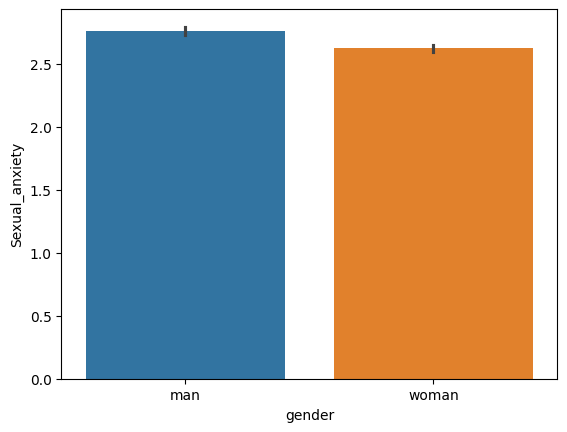

In [42]:
sns.barplot(x="gender", y = "Sexual_anxiety", data=df, hue = "gender")


Los resultados apuntan a que los hombres sufren más ansiedad sexual que las mujeres, sin embargo, la diferencia es muy pequeña. La ansiedad sexual es definida como la tendencia a sentir tensión, incomodidad y ansiedad acerca de los aspectos sexuales de la propia vida.

Para probar parte de la hipótesis principal, se analiza si hay diferencias en base al género en el resto de categorías sexuales. Previamente vuelvo a comprobar el supuesto de normalidad de las variables dependientes.

In [43]:
columnas_a_probar = [
    'Sexual_anxiety',
    'Sexual_self-efficacy',
    'Sexual_consciousness',
    'Motivation_to_avoid_risky_sex',
    'Chance/luck_sexual_control',
    'Sexual_preoccupation',
    'Sexual_assertiveness',
    'Sexual_optimism',
    'Sexual_problem_self-blame',
    'Sexual_monitoring',
    'Sexual_motivation',
    'Sexual_problem_management',
    'Sexual_self-esteem',
    'Sexual_satisfaction',
    'Power_other_sexual_control',
    'Sexual_self-schemata',
    'Fear_of_sex',
    'Sexual_problem_prevention',
    'Sexual_depression',
    'Internal_sexual_control'
]

# Iterar sobre cada columna y realizar la prueba de normalidad
for columna in columnas_a_probar:
    ks_statistic, p_value = kstest(df[columna], 'norm')
    print(f"Columna: {columna}")
    print(f"Estadístico KS: {ks_statistic}")
    print(f"Valor P: {p_value}")
    print("\n")


Columna: Sexual_anxiety
Estadístico KS: 0.8413447460685429
Valor P: 0.0


Columna: Sexual_self-efficacy
Estadístico KS: 0.8961233311962864
Valor P: 0.0


Columna: Sexual_consciousness
Estadístico KS: 0.9537296743241048
Valor P: 0.0


Columna: Motivation_to_avoid_risky_sex
Estadístico KS: 0.958938085865651
Valor P: 0.0


Columna: Chance/luck_sexual_control
Estadístico KS: 0.8413447460685429
Valor P: 0.0


Columna: Sexual_preoccupation
Estadístico KS: 0.8413447460685429
Valor P: 0.0


Columna: Sexual_assertiveness
Estadístico KS: 0.8413447460685429
Valor P: 0.0


Columna: Sexual_optimism
Estadístico KS: 0.9007012767428288
Valor P: 0.0


Columna: Sexual_problem_self-blame
Estadístico KS: 0.9089787180988518
Valor P: 0.0


Columna: Sexual_monitoring
Estadístico KS: 0.8636654755345207
Valor P: 0.0


Columna: Sexual_motivation
Estadístico KS: 0.8558906127257894
Valor P: 0.0


Columna: Sexual_problem_management
Estadístico KS: 0.9578939930217027
Valor P: 0.0


Columna: Sexual_self-esteem
Estad

In [44]:
data_to_plot = ["Sexual_anxiety", "Sexual_self-efficacy", "Sexual_consciousness", "Motivation_to_avoid_risky_sex" , "Chance/luck_sexual_control", "Sexual_preoccupation", "Sexual_assertiveness", "Sexual_optimism", "Sexual_problem_self-blame", "Sexual_monitoring", "Sexual_motivation", "Sexual_problem_management", "Sexual_self-esteem", "Sexual_satisfaction", "Power_other_sexual_control", "Sexual_self-schemata", "Fear_of_sex", "Sexual_problem_prevention", "Sexual_depression", "Internal_sexual_control"]
# Definir una función para realizar la prueba de Mann-Whitney U
def mann_whitney_test(column):
    group_man = df[df['gender'] == 'man'][column]
    group_woman = df[df['gender'] == 'woman'][column]
    mean_man = group_man.mean()
    mean_woman = group_woman.mean()

    u_statistic, p_value = mannwhitneyu(group_man, group_woman, alternative='two-sided')
    return u_statistic, p_value, mean_man, mean_woman

# Realizar la prueba de Mann-Whitney U para cada columna
for column in data_to_plot:
    u_statistic, p_value,  mean_man, mean_woman = mann_whitney_test(column)
    print(f'Columna: {column}')
    print(f'U Statistic: {u_statistic}')
    print(f'P-Value: {p_value}')
    print(f"La media de los hombres es de {mean_man} y la media de las mujeres es de {mean_woman}")
    print("\n")

Columna: Sexual_anxiety
U Statistic: 20151793.0
P-Value: 1.540385163982365e-09
La media de los hombres es de 2.7601960045231815 y la media de las mujeres es de 2.6226452064380683


Columna: Sexual_self-efficacy
U Statistic: 17105276.5
P-Value: 9.0168341816054e-21
La media de los hombres es de 3.4057670561628344 y la media de las mujeres es de 3.5788663400979708


Columna: Sexual_consciousness
U Statistic: 19361368.0
P-Value: 0.0399866238278221
La media de los hombres es de 4.041650961176027 y la media de las mujeres es de 3.9738558432470255


Columna: Motivation_to_avoid_risky_sex
U Statistic: 16160270.5
P-Value: 4.796554215193868e-46
La media de los hombres es de 4.043874858650584 y la media de las mujeres es de 4.273030090972708


Columna: Chance/luck_sexual_control
U Statistic: 22270653.0
P-Value: 5.463211997799748e-63
La media de los hombres es de 2.5686392762909915 y la media de las mujeres es de 2.2403079076277117


Columna: Sexual_preoccupation
U Statistic: 22448350.5
P-Value: 1

Vamos a visualizar en un gráfico de líneas las medias de cada una de las categorías sexuales para hombres y mujeres:

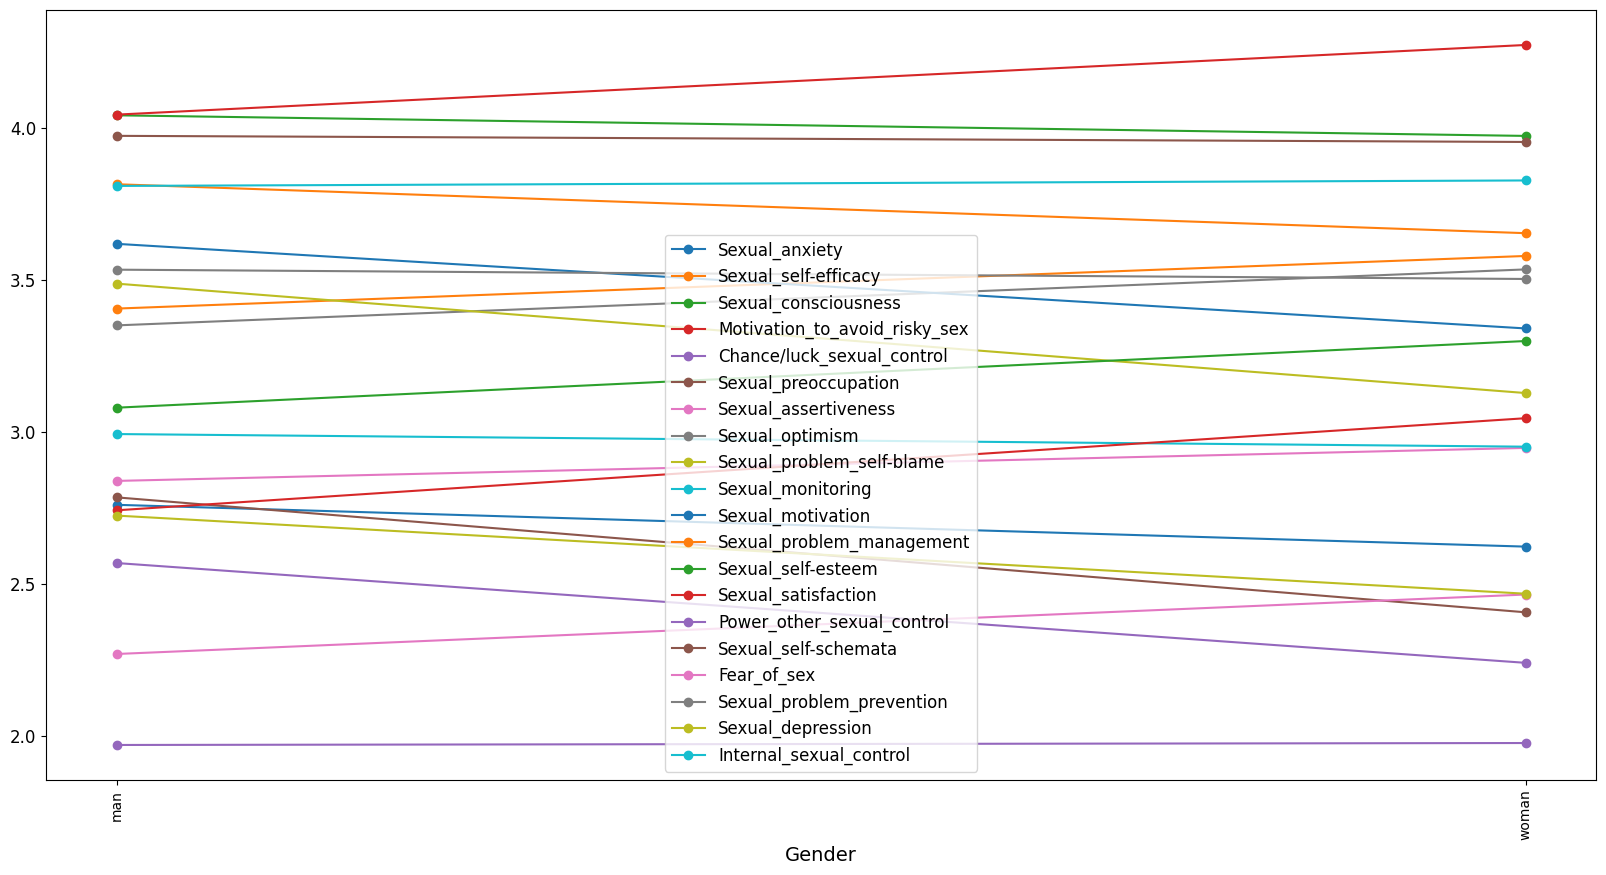

In [45]:
# Calcular las medias de las diferentes categorías para cada género
categories = ["Sexual_anxiety", "Sexual_self-efficacy", "Sexual_consciousness", "Motivation_to_avoid_risky_sex" , "Chance/luck_sexual_control", "Sexual_preoccupation", "Sexual_assertiveness", "Sexual_optimism", "Sexual_problem_self-blame", "Sexual_monitoring", "Sexual_motivation", "Sexual_problem_management", "Sexual_self-esteem", "Sexual_satisfaction", "Power_other_sexual_control", "Sexual_self-schemata", "Fear_of_sex", "Sexual_problem_prevention", "Sexual_depression", "Internal_sexual_control"]

means_by_category = {}
for category in categories:
    means_by_category[category] = df.groupby('gender')[category].mean()

# Configurar la figura
plt.figure(figsize=(20, 10))  # Ajustar el tamaño de la figura según sea necesario
plt.xticks(rotation=90, fontsize=10)  # Rotar y ajustar el tamaño de la fuente de las etiquetas del eje x
plt.yticks(fontsize=12)  # Ajustar el tamaño de la fuente de las etiquetas del eje y

# Graficar líneas para cada categoría de datos
for category, means in means_by_category.items():
    plt.plot(means.index, means.values, marker='o', linestyle='-', label=category)

# Agregar etiquetas y leyenda
plt.xlabel('Gender', fontsize=14)
plt.legend(fontsize=12)

# Mostrar el gráfico
plt.show()

**Conclusión**: Se observan que todas las categorías sexuales sufren diferencias entre hombres y mujeres de modo que:  

Los hombres parecen sufrir más ansiedad y depresión sexual que las mujeres, tener más conciencia sexual, sentir más control seual por azar o suerte, preocuparse más por el sexo, autoinculparse por problemas sexuales y monitorear situaciones, así como tener más motivación y mayor gestión de problemas.

Las mujeres parecen tener mayor autoeficacia sexual, presentar mayor motivación para evitar riesgos sexuales, tener mayor asertividad, autoestima, optimismo, satisfacción, aunque también mayor miedo al sexo que los hombres.  

No parece haber diferencias signiticativas en el control por otros, autoesquemas, control sexual interno y prevención de problemas sexuales. 

### H2. La ansiedad sexual se vivirá en mayor o menor intensidad según el grupo de edad al que pertenezca una persona.  


Veamos qué ocurre con la edad. ¿Hay relación entre la edad y la ansiedad sexual vivenciada? Para ello vamos a hacer la prueba no paramétrica de Kruskal-Wallis y vamos a visualizar las distribuciones de ansiedad por grupo de edad.

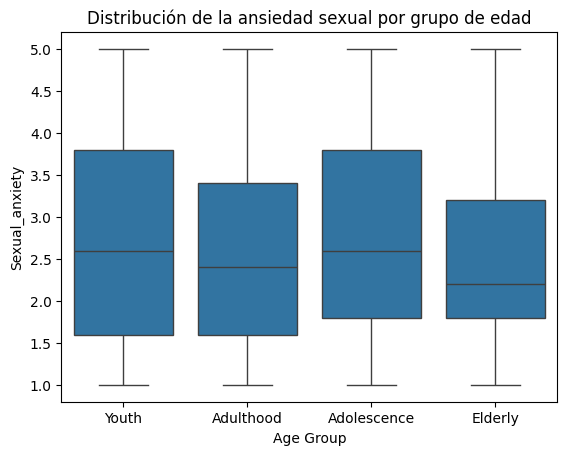

Estadística de prueba de Kruskal-Wallis: 62.59108071118603
Valor p: 1.642461828632157e-13


In [46]:
from scipy.stats import kruskal

# Utiliza boxplot para visualizar la distribución de ansiedad sexual por grupo de edad
sns.boxplot(x='Age Group', y='Sexual_anxiety', data=df)
plt.title('Distribución de la ansiedad sexual por grupo de edad')
plt.show()

# Aplica la prueba de Kruskal-Wallis para analizar la relación
resultado_kw = kruskal(*[grupo['Sexual_anxiety'] for nombre, grupo in df.groupby('Age Group')])

print('Estadística de prueba de Kruskal-Wallis:', resultado_kw.statistic)
print('Valor p:', resultado_kw.pvalue)

Se observa cómo evoluciona la media de ansiedad sexual por género conforme se avanza hacia un grupo de edad superior.

In [ ]:
grouped = df.groupby(['Age Group', 'gender'])['Sexual_anxiety'].mean().unstack()
# Definir el orden de las categorías de edad
age_group_order = ['Adolescence', 'Youth', 'Adulthood', 'Elderly']

grouped

gender,man,woman
Age Group,,
Adolescence,2.856566,2.737660
Adulthood,2.648722,2.451709
Elderly,2.542857,2.162500
Youth,2.806180,2.635736


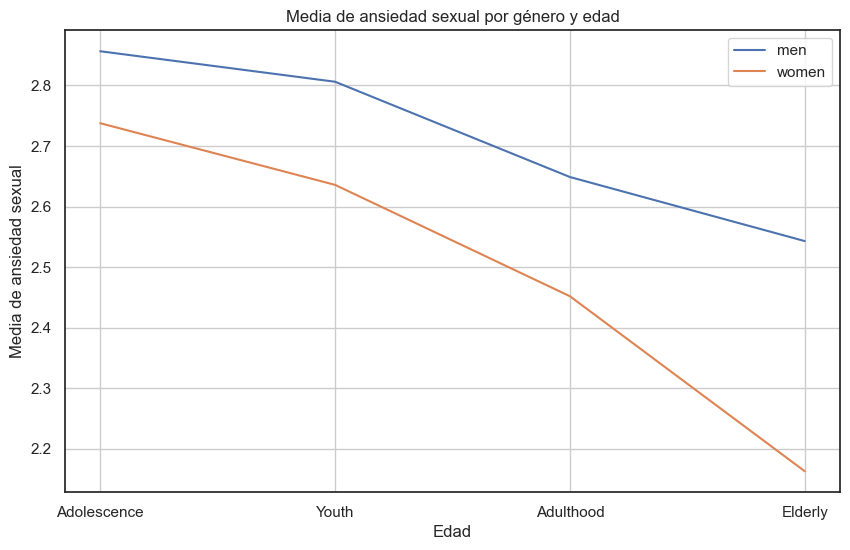

In [ ]:

# Reordenar el DataFrame grouped según el orden de las categorías de edad
grouped = grouped.reindex(age_group_order)

# Graficar
plt.figure(figsize=(10, 6))

grouped['man'].plot(label='men')
grouped['woman'].plot(label='women')

# Establecer el orden de las etiquetas de edad en el eje x
plt.xticks(range(len(age_group_order)), age_group_order)

plt.title('Media de ansiedad sexual por género y edad')
plt.xlabel('Edad')
plt.ylabel('Media de ansiedad sexual')
plt.legend()
plt.grid(True)
plt.show()


En vista de los resultados, concluimos que sí hay relación significativa entre la edad y la ansiedad sexual manifestada, aunque esta diferencia sea muy pequeña.

### H3. La satisfación sexual se vivirá de forma diferente según el grupo de edad al que pertenezca la persona

Ampliamos la búsqueda para analizar si hay diferencias significativas en cada uno de los aspectos que mide el MSSCQ.

In [48]:
# Realiza la prueba de Kruskal-Wallis para cada variable dependiente["Sexual_anxiety", "Sexual_self-efficacy", "Sexual_consciousness", "Motivation_to_avoid_risky_sex" , "Chance/luck_sexual_control", "Sexual_preoccupation", "Sexual_assertiveness", "Sexual_optimism", "Sexual_problem_self-blame", "Sexual_monitoring", "Sexual_motivation", "Sexual_problem_management", "Sexual_self-esteem", "Sexual_satisfaction", "Power_other_sexual_control", "Sexual_self-schemata", "Fear_of_sex", "Sexual_problem_prevention", "Sexual_depression", "Internal_sexual_control"]
for categories in data_to_plot:
    resultado_kw = kruskal(*[grupo[categories] for nombre, grupo in df.groupby('Age Group')])
    
    # Imprime el resultado para cada variable dependiente
    print('Variable Dependiente:', categories)
    print('Estadística de prueba de Kruskal-Wallis:', resultado_kw.statistic)
    print('Valor p:', resultado_kw.pvalue)
    print('')

Variable Dependiente: Sexual_anxiety
Estadística de prueba de Kruskal-Wallis: 62.59108071118603
Valor p: 1.642461828632157e-13

Variable Dependiente: Sexual_self-efficacy
Estadística de prueba de Kruskal-Wallis: 73.42450478410979
Valor p: 7.883706244979813e-16

Variable Dependiente: Sexual_consciousness
Estadística de prueba de Kruskal-Wallis: 24.161774192846813
Valor p: 2.3110734964322625e-05

Variable Dependiente: Motivation_to_avoid_risky_sex
Estadística de prueba de Kruskal-Wallis: 84.43080503907422
Valor p: 3.4381873486744013e-18

Variable Dependiente: Chance/luck_sexual_control
Estadística de prueba de Kruskal-Wallis: 38.651441678605266
Valor p: 2.057303629517724e-08

Variable Dependiente: Sexual_preoccupation
Estadística de prueba de Kruskal-Wallis: 33.87204751421768
Valor p: 2.1083167653135847e-07

Variable Dependiente: Sexual_assertiveness
Estadística de prueba de Kruskal-Wallis: 98.16638956317951
Valor p: 3.852291921703891e-21

Variable Dependiente: Sexual_optimism
Estadístic

Se observan diferencias significativas intergrupales según el grupo de edad de la persona, salvo con la depresión sexual, con la que parece no haber diferencia intergrupal. Vamos a verla gráficamente:

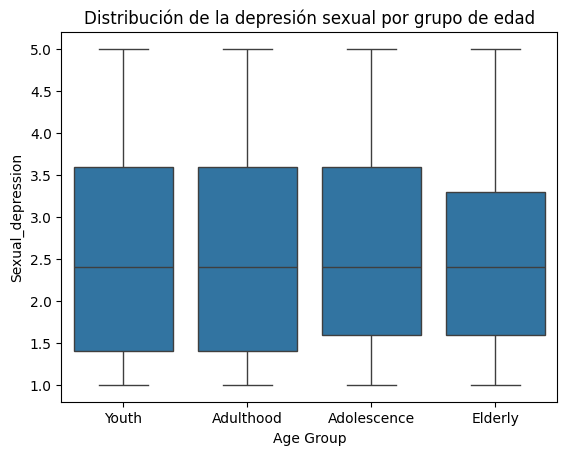

In [49]:
# Utiliza boxplot para visualizar la distribución de depresión sexual por grupo de edad
sns.boxplot(x='Age Group', y='Sexual_depression', data=df)
plt.title('Distribución de la depresión sexual por grupo de edad')
plt.show()

<Axes: xlabel='Sexual_depression', ylabel='Sexual_anxiety'>

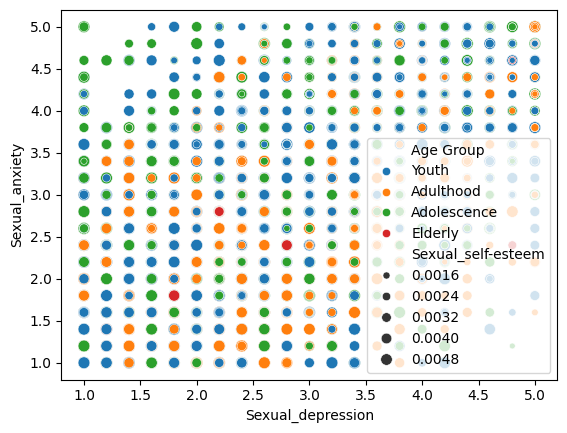

In [50]:
sns.scatterplot(x="Sexual_depression", y= "Sexual_anxiety", 
                size = df["Sexual_self-esteem"]/1000, 
                data = df, hue = "Age Group")

Observo que no tiene mucho sentido hacer scatterplot ya que las respuestas van de 1 a 5, y por tanto, la mancha de puntos en el gráfico no va a ser orientativa, ya que van a coincidir muchos puntos en el eje x e y. Pruebo con graficar todos los grupos de edades, teniendo el cuenta el género para observar las diferencias en la ansiedad sexual:

C:\Users\maria\AppData\Local\Temp\ipykernel_22180\1671425584.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(


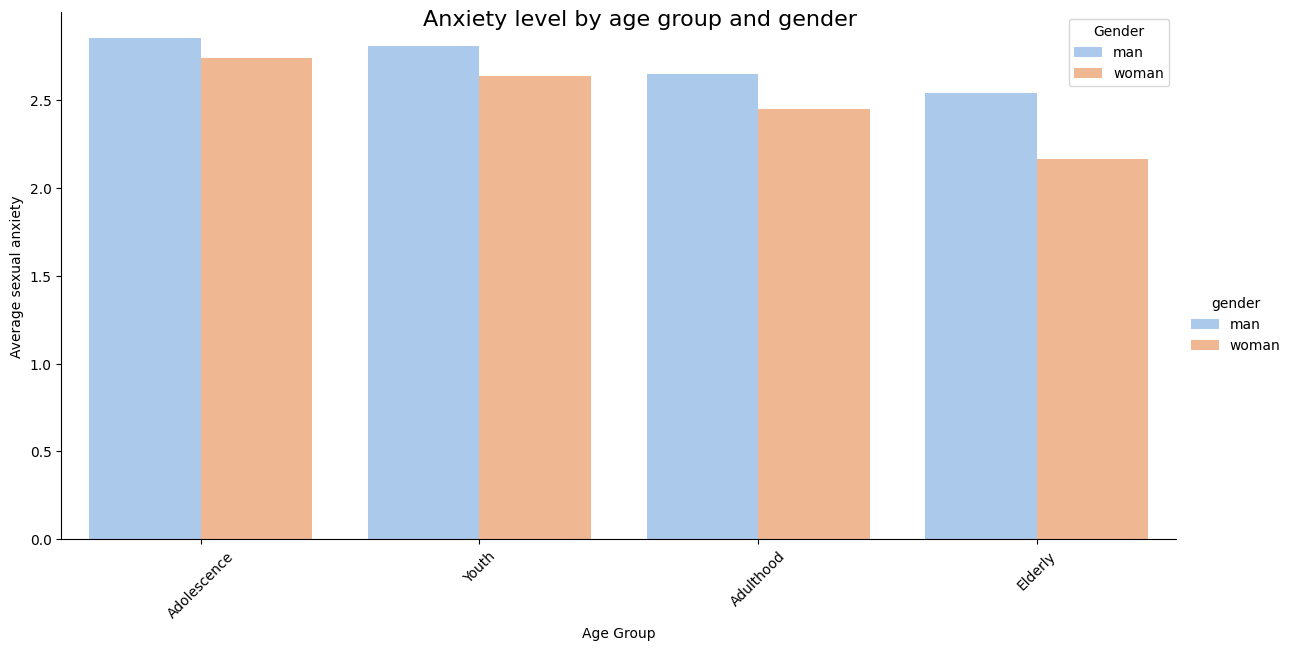

In [51]:
#Ordenar las etiquetas del eje x
age_group_order = ['Adolescence', 'Youth', 'Adulthood', 'Elderly']

# Crea un gráfico de barras con Seaborn
sns.catplot(
    x='Age Group', 
    y='Sexual_anxiety', 
    hue='gender', 
    data=df, 
    kind='bar', 
    height=6, 
    aspect=2, 
    palette='pastel',  # Puedes cambiar la paleta de colores si lo deseas
    legend=True,
    ci=None, #para eliminar las líneas verticales 
    order = age_group_order
)

# Ajusta el título y las etiquetas del gráfico
plt.suptitle('Anxiety level by age group and gender', fontsize=16)
plt.xlabel('Age Group')
plt.ylabel('Average sexual anxiety')
plt.xticks(rotation=45)  # Rota las etiquetas del eje x si es necesario

# Muestra la leyenda
plt.legend(title='Gender')

# Muestra el gráfico
plt.show()


Vamos a calcular cómo se comporta la ansiedad sexual en cada una de las edades, es decir, cómo va evolucionando la ansiedad sexual según la edad:

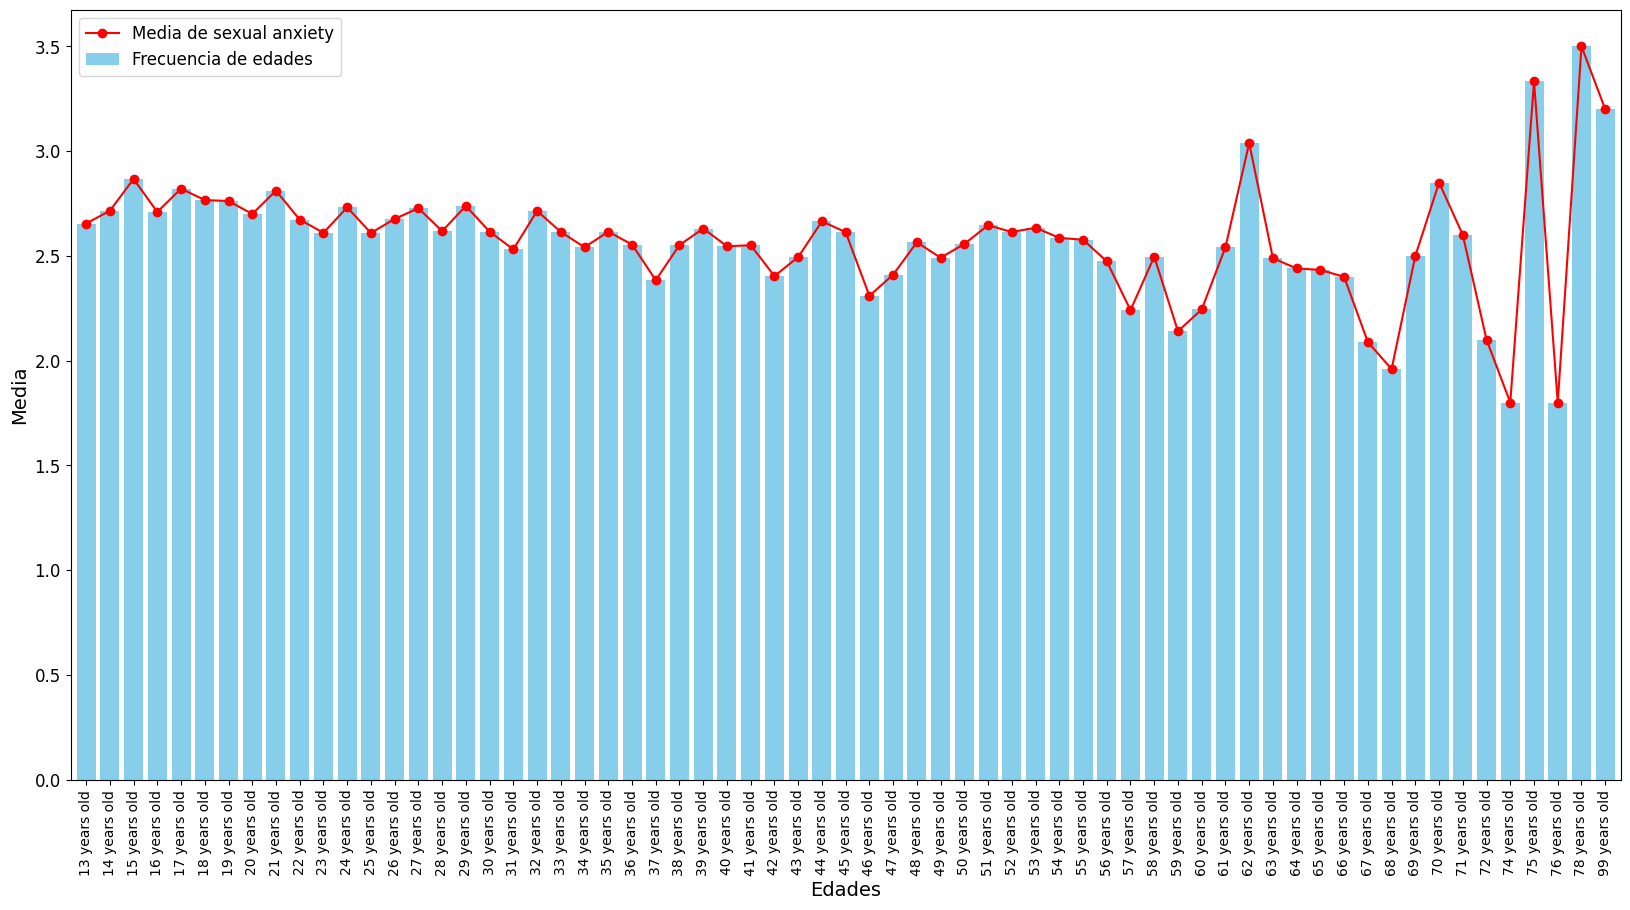

In [52]:
# Agrupar el DataFrame por la columna 'years_old' y calcular la media de 'Sexual_anxiety' para cada grupo
sexual_anxiety_mean_by_years_old = df.groupby('years_old')['Sexual_anxiety'].mean()
sexual_anxiety_mean_by_years_old

# Ordenar los valores por las etiquetas
ordered_means = sexual_anxiety_mean_by_years_old.sort_index()

# Configurar la figura
plt.figure(figsize=(20, 10))  # Ajustar el tamaño de la figura según sea necesario
plt.xticks(rotation=90, fontsize=10)  # Rotar y ajustar el tamaño de la fuente de las etiquetas del eje x
plt.yticks(fontsize=12)  # Ajustar el tamaño de la fuente de las etiquetas del eje y

# Graficar el histograma de barras
ordered_means.plot(kind='bar', width=0.8, color='skyblue', label='Frecuencia de edades')

# Graficar la línea de la media
plt.plot(ordered_means.index, ordered_means.values, marker='o', linestyle='-', color='red', label='Media de sexual anxiety')

# Agregar etiquetas y leyenda
plt.xlabel('Edades', fontsize=14)
plt.ylabel('Media', fontsize=14)
plt.legend(fontsize=12)

# Mostrar el gráfico
plt.show()


Observamos las diferencias de medias intergrupales con respecto a la satisfacción sexual, que es objeto de nuestra quinta hipótesis.

C:\Users\maria\AppData\Local\Temp\ipykernel_22180\223878658.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(


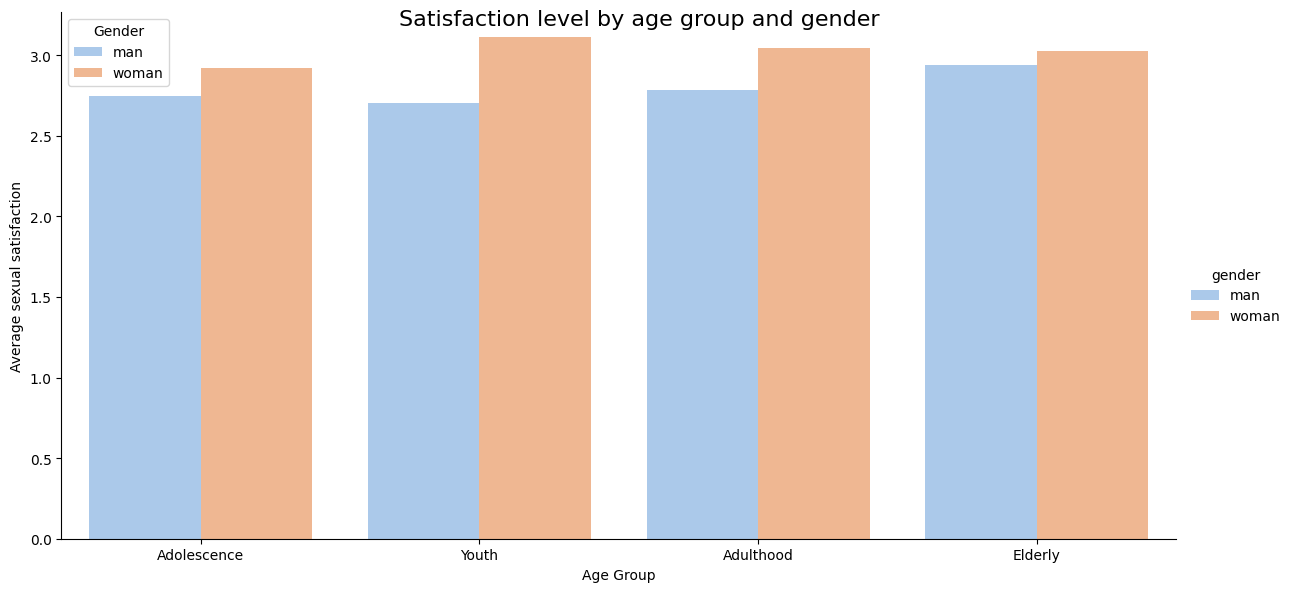

In [53]:
#Ordenar las etiquetas del eje x
age_group_order = ['Adolescence', 'Youth', 'Adulthood', 'Elderly']

# Crea un gráfico de barras con Seaborn
sns.catplot(
    x='Age Group', 
    y= 'Sexual_satisfaction', 
    hue='gender', 
    data=df, 
    kind='bar', 
    height=6, 
    aspect=2, 
    palette='pastel',  # Puedes cambiar la paleta de colores si lo deseas
    legend=True,
    ci=None, #para eliminar las líneas verticales 
    order = age_group_order
)

# Ajusta el título y las etiquetas del gráfico
plt.suptitle('Satisfaction level by age group and gender', fontsize=16)
plt.xlabel('Age Group')
plt.ylabel('Average sexual satisfaction')
plt.xticks(rotation=360)  # Rota las etiquetas del eje x si es necesario

# Muestra la leyenda
plt.legend(title='Gender')

# Muestra el gráfico
plt.show()

In [76]:
grouped = df.groupby(['Age Group', 'gender'])['Sexual_satisfaction'].mean().unstack()
# Definir el orden de las categorías de edad
age_group_order = ['Adolescence', 'Youth', 'Adulthood', 'Elderly']

grouped

gender,man,woman
Age Group,,
Adolescence,2.746869,2.919775
Adulthood,2.784554,3.046035
Elderly,2.939683,3.025000
Youth,2.705217,3.112510


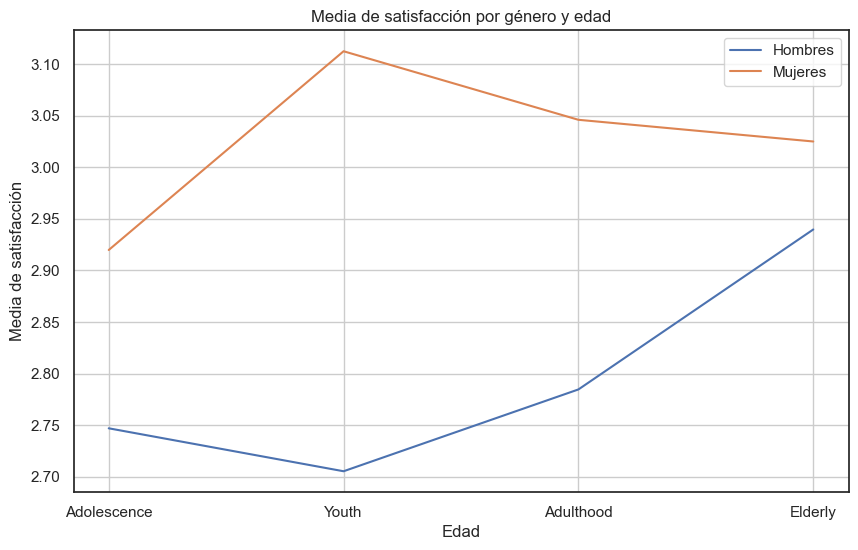

In [77]:
# Reordenar el DataFrame grouped según el orden de las categorías de edad
grouped = grouped.reindex(age_group_order)

# Graficar
plt.figure(figsize=(10, 6))

grouped['man'].plot(label='Hombres')
grouped['woman'].plot(label='Mujeres')

# Establecer el orden de las etiquetas de edad en el eje x
plt.xticks(range(len(age_group_order)), age_group_order)

plt.title('Media de satisfacción por género y edad')
plt.xlabel('Edad')
plt.ylabel('Media de satisfacción')
plt.legend()
plt.grid(True)
plt.show()


En la prueba U de Mann Whitney se observó que había diferencia significativa entre hombres y mujeres con respecto a la satisfacción sexual, siendo la media de satisfación de las mujeres mayor a la de los hombres. En este caso, al analizar las medias por edad y la prueba de Kruskal-Wallis, se observa que son las mujeres de todos los grupos quienes viven una mayor satisfacción, sobre todo en la juventud.

Observamos cómo se comporta la satisfacción sexual a lo largo de los años:

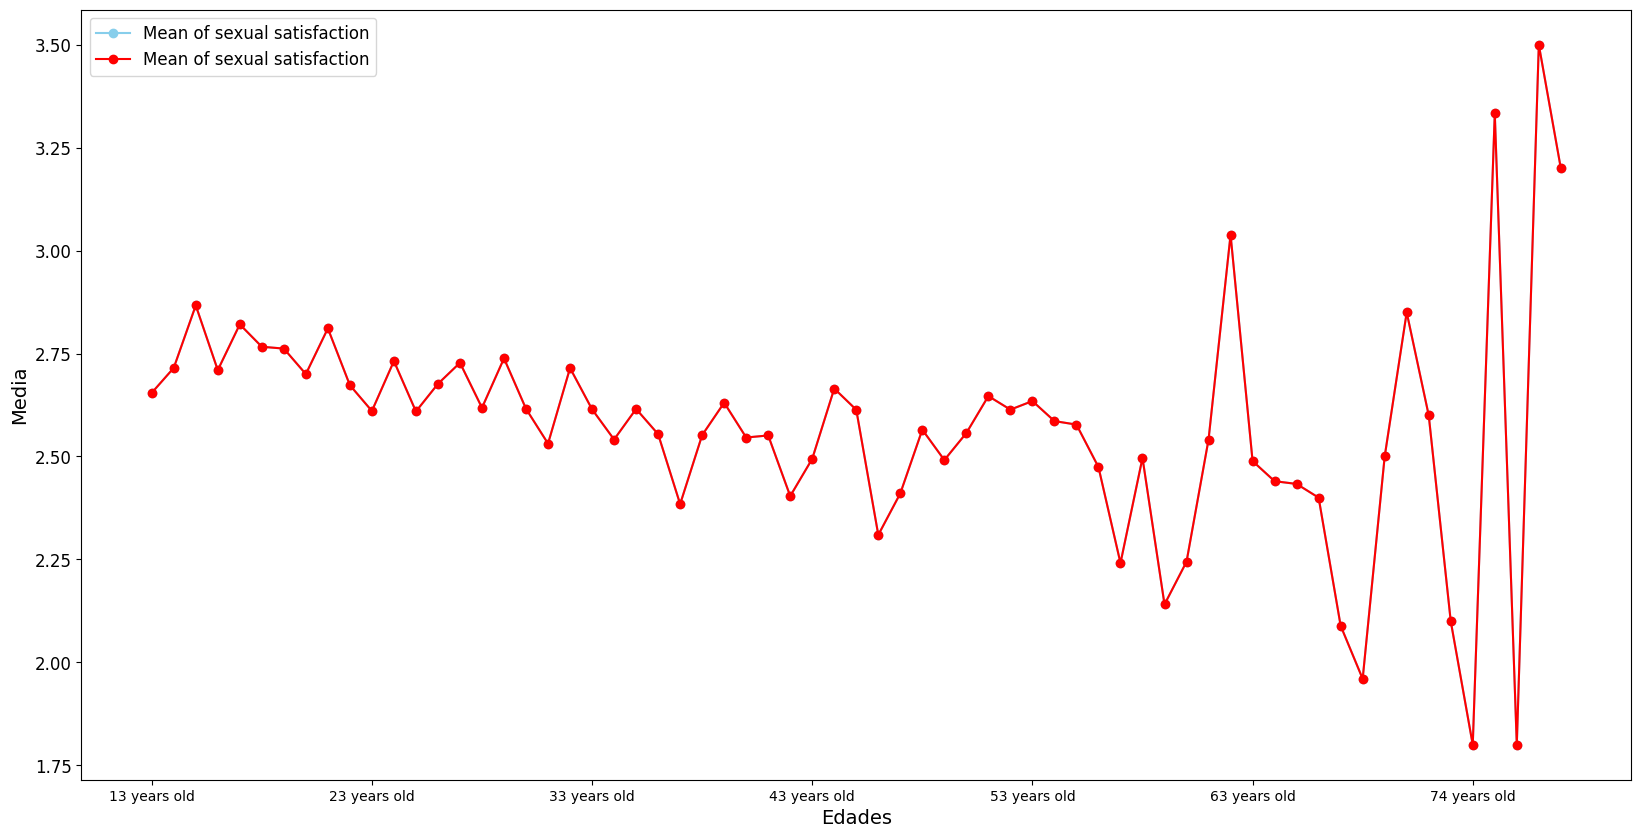

In [55]:
# Configurar la figura
plt.figure(figsize=(20, 10))  # Ajustar el tamaño de la figura según sea necesario
plt.xticks(rotation=90, fontsize=10)  # Rotar y ajustar el tamaño de la fuente de las etiquetas del eje x
plt.yticks(fontsize=12)  # Ajustar el tamaño de la fuente de las etiquetas del eje y

# Graficar el histograma de barras sin las barras de frecuencias
ordered_means.plot(kind='line', marker='o', linestyle='-', color='skyblue', label='Mean of sexual satisfaction')

# Graficar la línea de la media
plt.plot(ordered_means.index, ordered_means.values, marker='o', linestyle='-', color='red', label='Mean of sexual satisfaction')

# Agregar etiquetas y leyenda
plt.xlabel('Edades', fontsize=14)
plt.ylabel('Media', fontsize=14)
plt.legend(fontsize=12)

# Mostrar el gráfico
plt.show()


### H4. La satisfacción sexual correlacionará de forma positiva con la autoestima sexual.


In [56]:
from scipy.stats import pearsonr

# Calcular el coeficiente de correlación de Pearson y el valor p entre satisfacción sexual y autoestima sexual
corr_coefficient, p_value = pearsonr(df['Sexual_satisfaction'], df['Sexual_self-esteem'])

print("Coeficiente de correlación de Pearson:", corr_coefficient)
print("Valor p de significancia:", p_value)


Coeficiente de correlación de Pearson: 0.7813591994553802
Valor p de significancia: 0.0


Observamos todas las correlaciones ordenadas de mayor a menor que tiene la satisacción sexual con otras categorías sexuales:

In [57]:
numeric_df = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Ver la correlación con la variable 'Sexual_anxiety'
target_correlation = correlation_matrix['Sexual_satisfaction'].sort_values(ascending=False)

print(target_correlation)

Sexual_satisfaction              1.000000
Sexual_self-esteem               0.781359
Sexual_self-efficacy             0.722340
Sexual_optimism                  0.596017
Sexual_assertiveness             0.523690
Internal_sexual_control          0.415053
Sexual_consciousness             0.352075
Sexual_self-schemata             0.345448
Sexual_problem_prevention        0.275514
Sexual_motivation                0.264767
Sexual_problem_management        0.259350
Motivation_to_avoid_risky_sex    0.010142
Sexual_preoccupation            -0.003831
Sexual_problem_self-blame       -0.004544
age                             -0.008579
Sexual_monitoring               -0.054748
Power_other_sexual_control      -0.239169
Chance/luck_sexual_control      -0.337704
Fear_of_sex                     -0.458227
Sexual_anxiety                  -0.648298
Sexual_depression               -0.768869
Name: Sexual_satisfaction, dtype: float64


Se ve cómo se comporta la autoestima sexual por género y en cada grupo de edad.

In [ ]:
grouped = df.groupby(['Age Group', 'gender'])['Sexual_self-esteem'].mean().unstack()
# Definir el orden de las categorías de edad
age_group_order = ['Adolescence', 'Youth', 'Adulthood', 'Elderly']

grouped

gender,man,woman
Age Group,,
Adolescence,3.064040,3.160041
Adulthood,3.136513,3.385300
Elderly,3.326984,3.212500
Youth,3.039567,3.337586


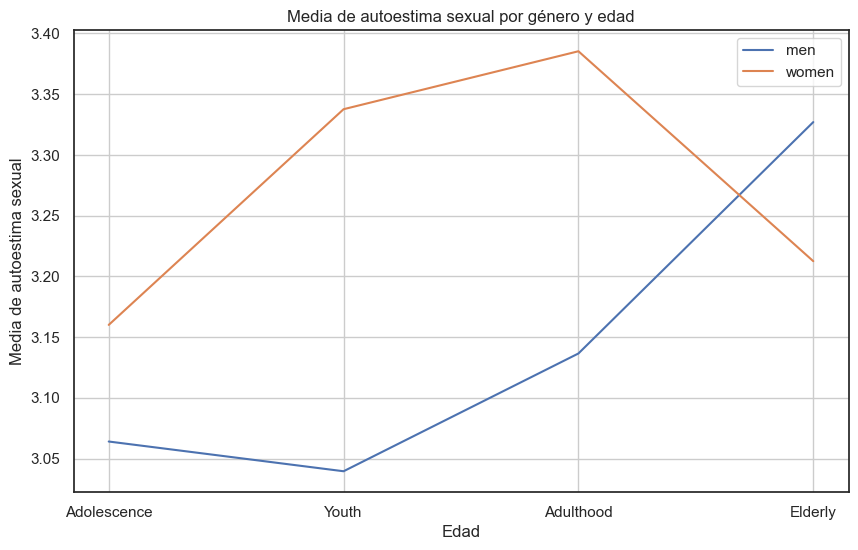

In [ ]:

# Reordenar el DataFrame grouped según el orden de las categorías de edad
grouped = grouped.reindex(age_group_order)

# Graficar
plt.figure(figsize=(10, 6))

grouped['man'].plot(label='men')
grouped['woman'].plot(label='women')

# Establecer el orden de las etiquetas de edad en el eje x
plt.xticks(range(len(age_group_order)), age_group_order)

plt.title('Media de autoestima sexual por género y edad')
plt.xlabel('Edad')
plt.ylabel('Media de autoestima sexual')
plt.legend()
plt.grid(True)
plt.show()


### H5. La ansiedad sexual correlacionará positivamente con el miedo al sexo.

In [59]:
# Calcular el coeficiente de correlación de Pearson y el valor p entre ansiedad sexual y supervisión sexual
corr_coefficient, p_value = pearsonr(df['Sexual_anxiety'], df['Fear_of_sex'])

print("Coeficiente de correlación de Pearson:", corr_coefficient)
print("Valor p de significancia:", p_value)

Coeficiente de correlación de Pearson: 0.6351832277202052
Valor p de significancia: 0.0


Sí hay correlación positiva de 0.63 entre ansiedad sexual y miedo al sexo.

Vamos a ver cómo se comporta el miedo al sexo.

In [ ]:
grouped = df.groupby(['Age Group', 'gender'])['Fear_of_sex'].mean().unstack()
# Definir el orden de las categorías de edad
age_group_order = ['Adolescence', 'Youth', 'Adulthood', 'Elderly']

grouped

gender,man,woman
Age Group,,
Adolescence,2.457374,2.760450
Adulthood,2.048154,2.139007
Elderly,2.171429,2.275000
Youth,2.353531,2.445844


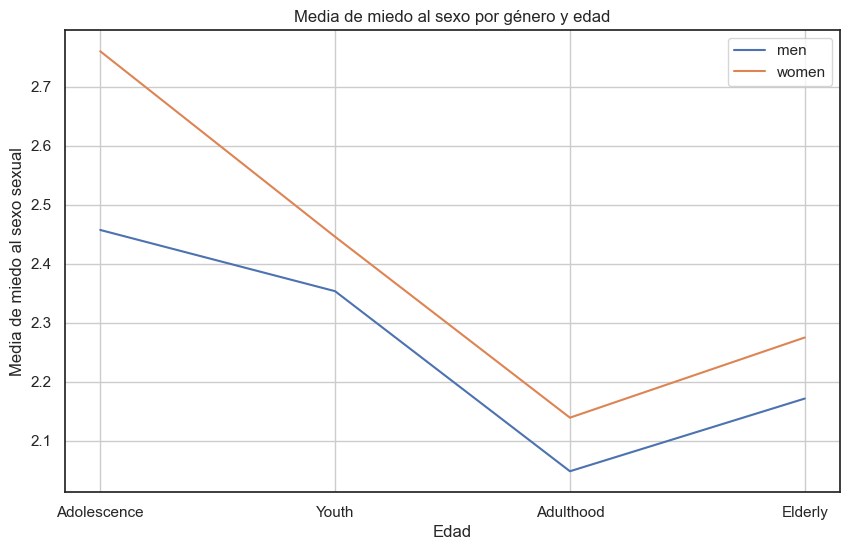

In [ ]:

# Reordenar el DataFrame grouped según el orden de las categorías de edad
grouped = grouped.reindex(age_group_order)

# Graficar
plt.figure(figsize=(10, 6))

grouped['man'].plot(label='men')
grouped['woman'].plot(label='women')

# Establecer el orden de las etiquetas de edad en el eje x
plt.xticks(range(len(age_group_order)), age_group_order)

plt.title('Media de miedo al sexo por género y edad')
plt.xlabel('Edad')
plt.ylabel('Media de miedo al sexo sexual')
plt.legend()
plt.grid(True)
plt.show()


Observamos todas las correlaciones ordenadas de mayor a menor que tiene la ansiedad sexual con otras categorías sexuales:

In [60]:
numeric_df = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Ver la correlación con la variable 'Sexual_anxiety'
target_correlation = correlation_matrix['Sexual_anxiety'].sort_values(ascending=False)

print(target_correlation)

Sexual_anxiety                   1.000000
Sexual_depression                0.792263
Fear_of_sex                      0.635183
Chance/luck_sexual_control       0.375691
Power_other_sexual_control       0.367941
Sexual_monitoring                0.304524
Sexual_problem_self-blame        0.130045
Sexual_preoccupation             0.078465
Motivation_to_avoid_risky_sex    0.043079
age                             -0.068369
Sexual_problem_management       -0.154377
Sexual_problem_prevention       -0.176183
Sexual_motivation               -0.216107
Sexual_consciousness            -0.264976
Internal_sexual_control         -0.288256
Sexual_self-schemata            -0.304035
Sexual_assertiveness            -0.523752
Sexual_self-efficacy            -0.576950
Sexual_optimism                 -0.615231
Sexual_self-esteem              -0.643823
Sexual_satisfaction             -0.648298
Name: Sexual_anxiety, dtype: float64


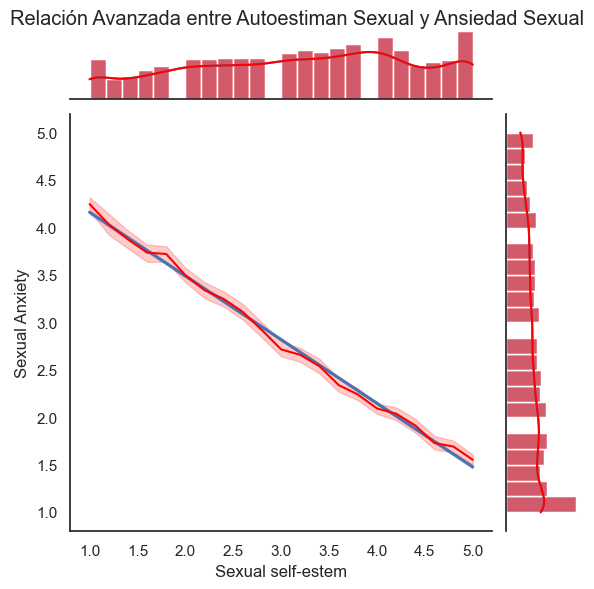

In [61]:
sns.set(style="white", color_codes=True)

g = sns.jointplot(x='Sexual_self-esteem', y='Sexual_anxiety', data=df, kind='reg', scatter=False)

g.plot_joint(sns.lineplot, color='red')

g.plot_marginals(sns.histplot, color='red', kde=True)

g.set_axis_labels('Sexual self-estem', 'Sexual Anxiety')
g.fig.suptitle('Relación Avanzada entre Autoestiman Sexual y Ansiedad Sexual')

plt.subplots_adjust(top=0.95)

plt.show()

Observamos gráficamente todas las correlaciones entre categorías sexuales:

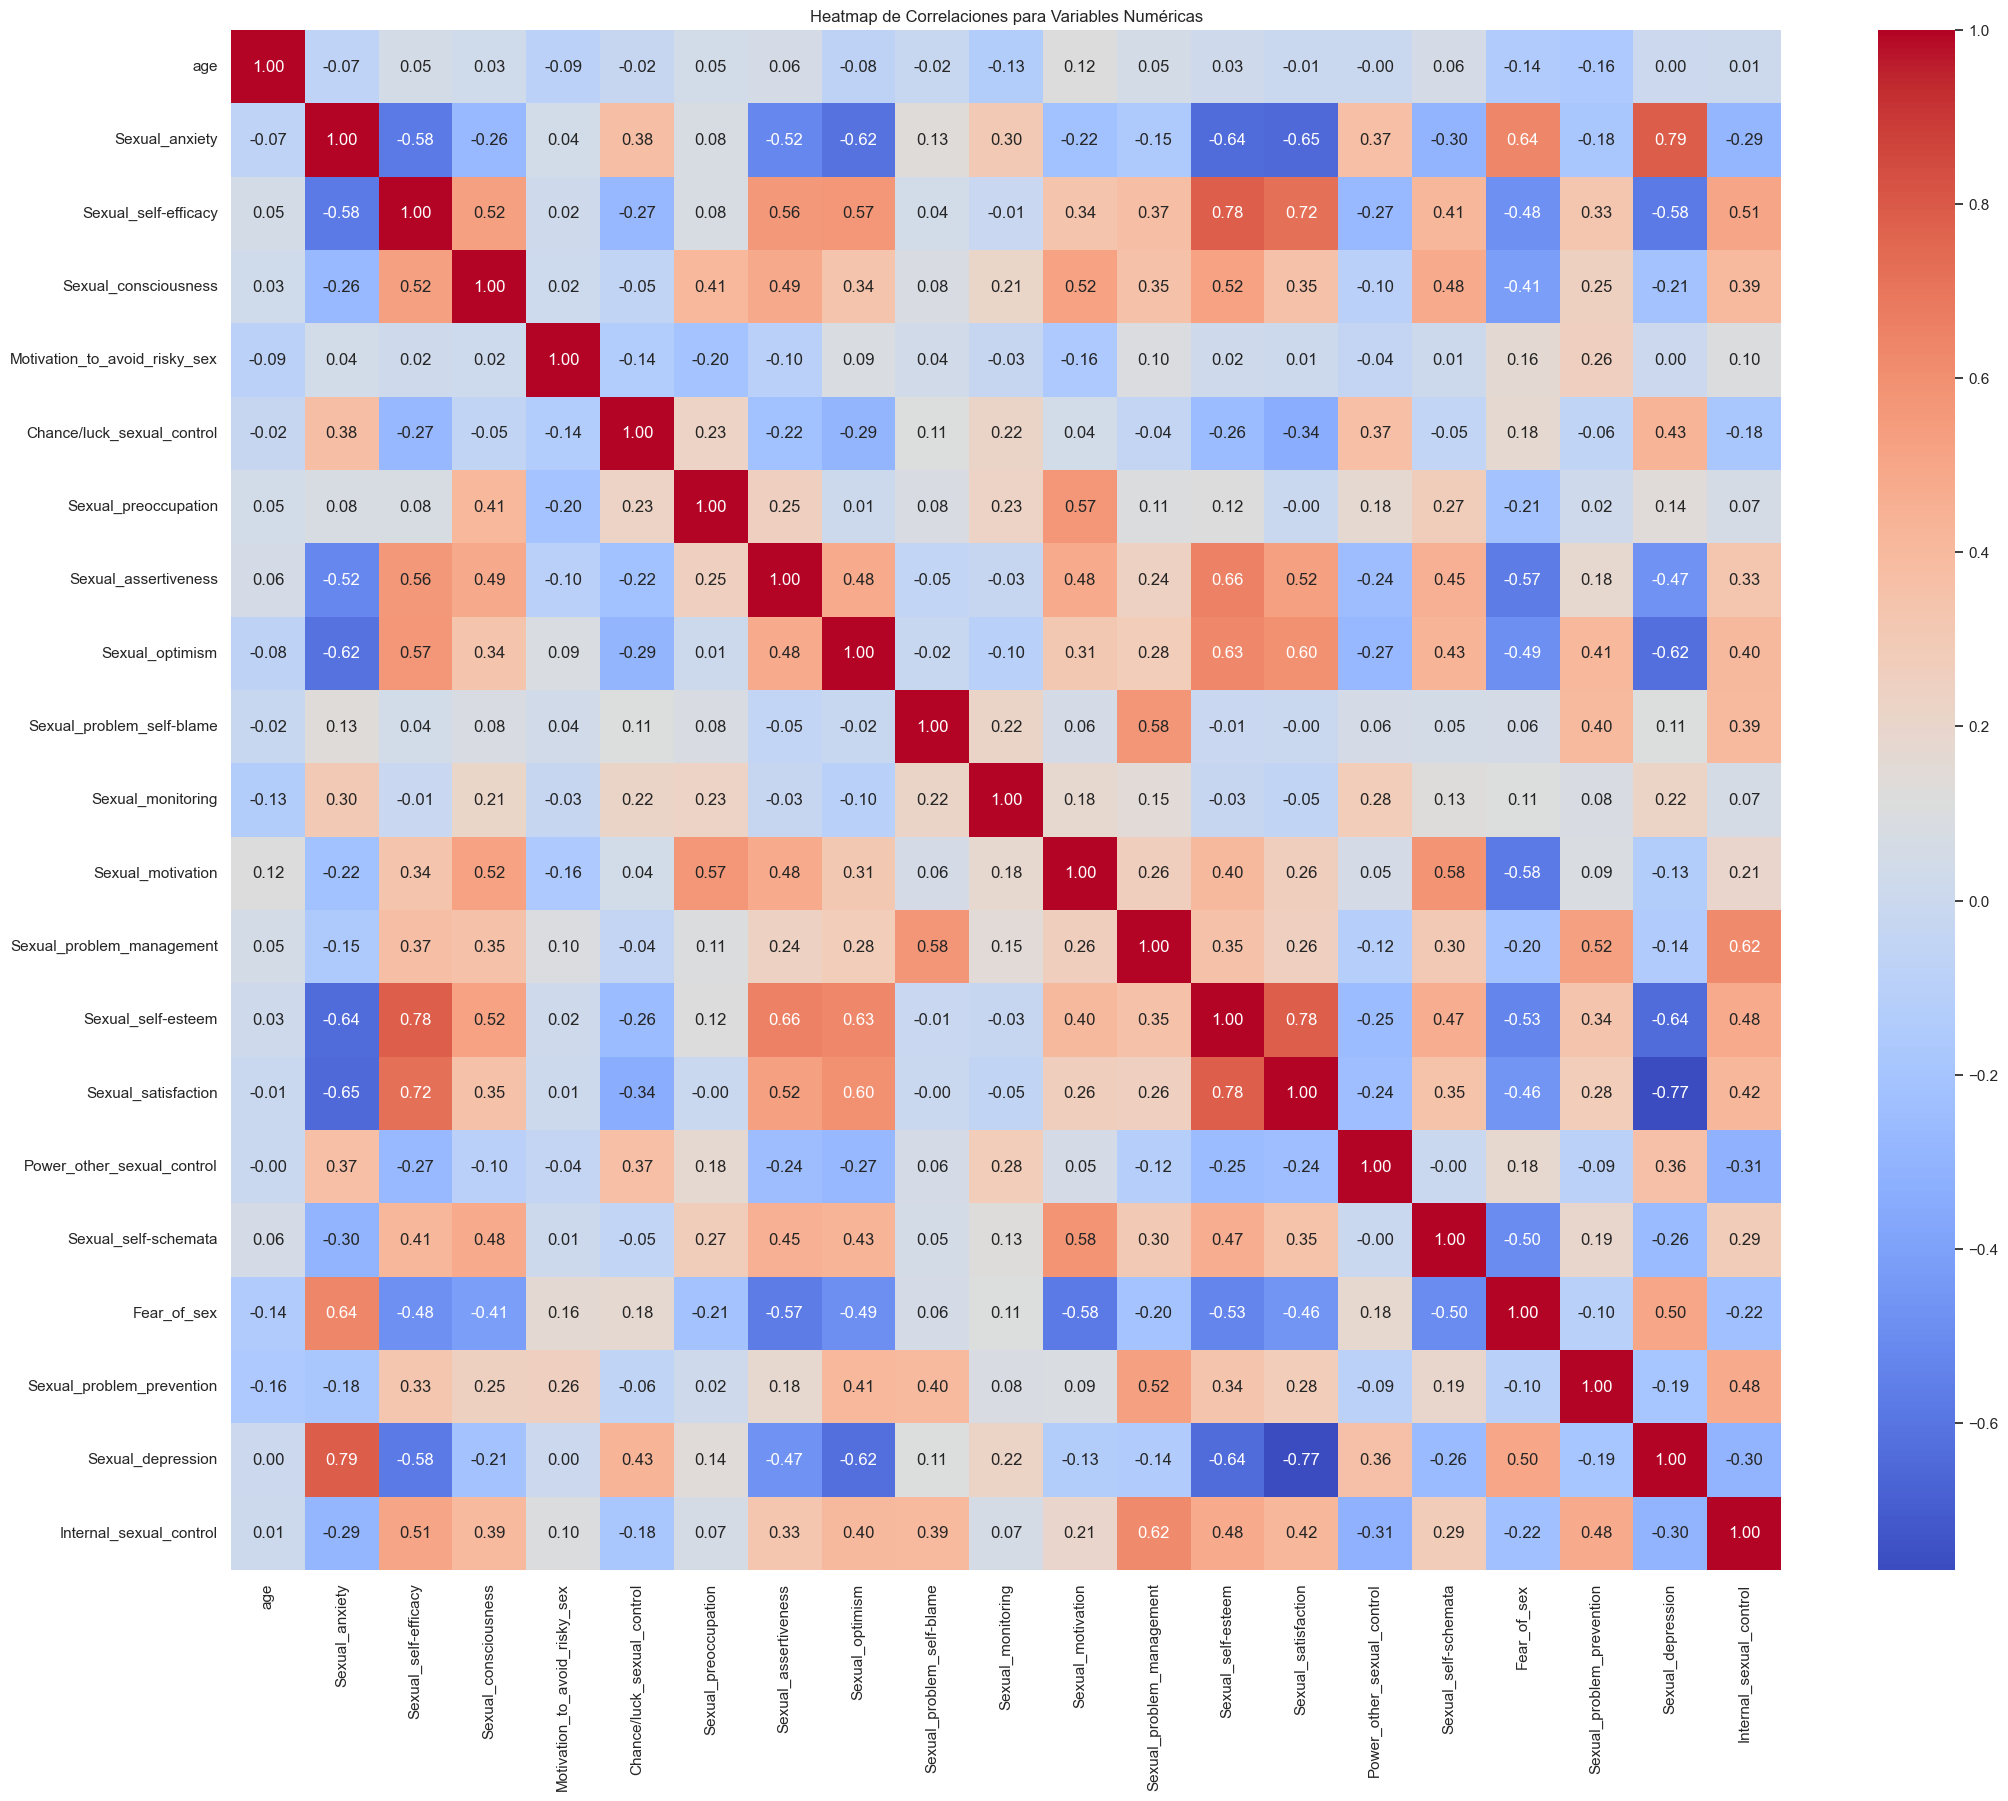

In [62]:
# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Crear el mapa de calor
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlaciones para Variables Numéricas')
plt.show()

Quiero hacer una visualización con las correlaciones más altas.

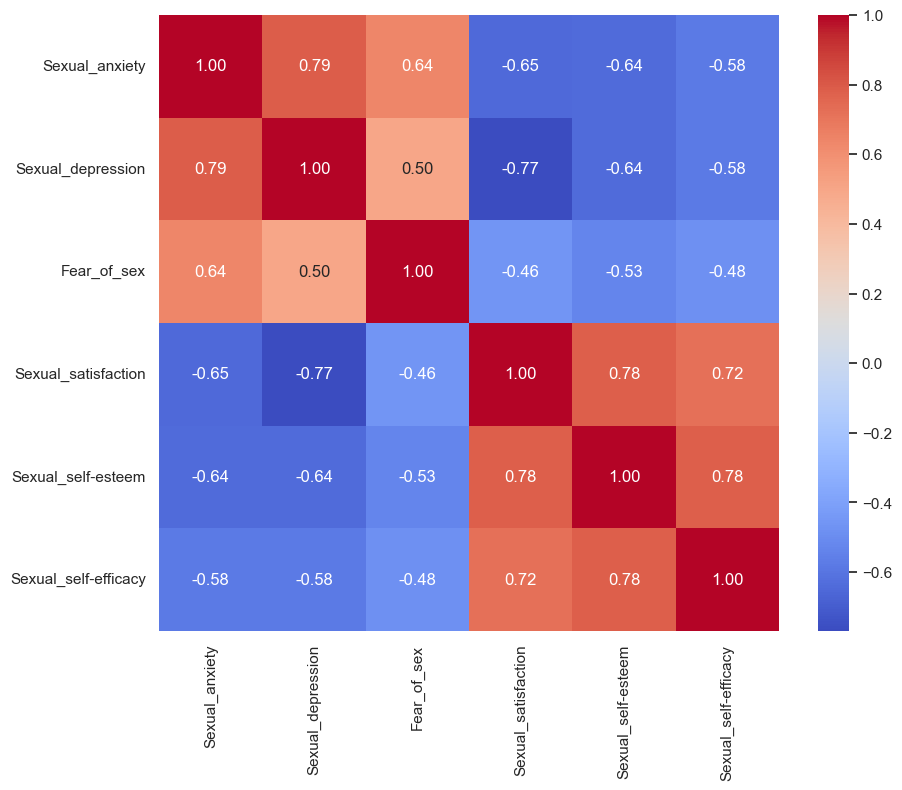

In [63]:
# Seleccionar solo las variables que quieres correlacionar
variables_a_correlacionar = ['Sexual_anxiety', 'Sexual_depression', 'Fear_of_sex', 'Sexual_satisfaction', 'Sexual_self-esteem', 'Sexual_self-efficacy']

# Filtrar el DataFrame original para incluir solo estas variables
df_variables_seleccionadas = df[variables_a_correlacionar]

# Calcular la matriz de correlación
correlation_matrix = df_variables_seleccionadas.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


Por último, se grafica la evolución de la depresión sexual, al ser la variable que más correlaciona con la ansiedad sexual.

In [ ]:
grouped = df.groupby(['Age Group', 'gender'])['Sexual_depression'].mean().unstack()
# Definir el orden de las categorías de edad
age_group_order = ['Adolescence', 'Youth', 'Adulthood', 'Elderly']

grouped

gender,man,woman
Age Group,,
Adolescence,2.767677,2.505979
Adulthood,2.657467,2.483559
Elderly,2.631746,2.612500
Youth,2.757544,2.439602


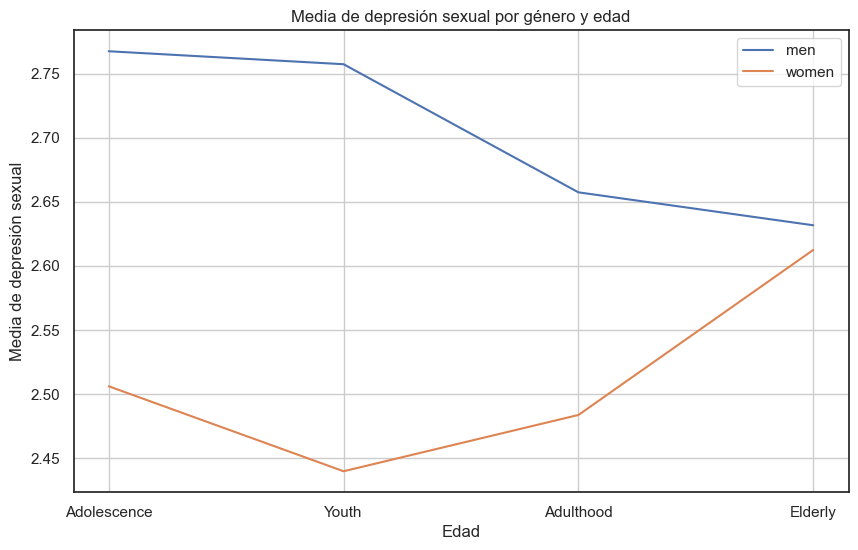

In [ ]:

# Reordenar el DataFrame grouped según el orden de las categorías de edad
grouped = grouped.reindex(age_group_order)

# Graficar
plt.figure(figsize=(10, 6))

grouped['man'].plot(label='men')
grouped['woman'].plot(label='women')

# Establecer el orden de las etiquetas de edad en el eje x
plt.xticks(range(len(age_group_order)), age_group_order)

plt.title('Media de depresión sexual por género y edad')
plt.xlabel('Edad')
plt.ylabel('Media de depresión sexual')
plt.legend()
plt.grid(True)
plt.show()


Correlaciones de autoestima sexual.

In [64]:
numeric_df = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Ver la correlación con la variable Autoestima sexual
target_correlation = correlation_matrix['Sexual_self-esteem'].sort_values(ascending=False)

print(target_correlation)

Sexual_self-esteem               1.000000
Sexual_self-efficacy             0.782975
Sexual_satisfaction              0.781359
Sexual_assertiveness             0.655624
Sexual_optimism                  0.633754
Sexual_consciousness             0.521850
Internal_sexual_control          0.476586
Sexual_self-schemata             0.466129
Sexual_motivation                0.400819
Sexual_problem_management        0.354627
Sexual_problem_prevention        0.343019
Sexual_preoccupation             0.119327
age                              0.025160
Motivation_to_avoid_risky_sex    0.022387
Sexual_problem_self-blame       -0.013566
Sexual_monitoring               -0.025867
Power_other_sexual_control      -0.254132
Chance/luck_sexual_control      -0.256380
Fear_of_sex                     -0.531168
Sexual_depression               -0.637778
Sexual_anxiety                  -0.643823
Name: Sexual_self-esteem, dtype: float64
